Import pandas, load in the three datasets found at: https://nhts.ornl.gov/downloads for the 2022 CSV zip

In [101]:
import pandas as pd

# Load the core datasets
hh = pd.read_csv('hhv2pub.csv')
person = pd.read_csv('perv2pub.csv')
trip = pd.read_csv('tripv2pub.csv')

# Quick checks
print("Household shape:", hh.shape)
print("Person shape:", person.shape)
print("Trip shape:", trip.shape)


Household shape: (7893, 43)
Person shape: (16997, 153)
Trip shape: (31074, 102)


In [102]:
hh.head()

HOUSEID       WTHHFIN     WTHHFIN5D     WTHHFIN2D  NUMADLT  HOMEOWN  \
0  9000013002   4621.758002      0.000000  13946.191168        2        1   
1  9000013016   2982.998407   3878.814279      0.000000        2        3   
2  9000013026   9979.573402  14700.796695      0.000000        1        3   
3  9000013039  10355.890735  13150.678996      0.000000        2        3   
4  9000013041   4926.862529   7061.357485      0.000000        1        1   

   HOMETYPE  RAIL  CENSUS_D  CENSUS_R  ...  WRKCOUNT  STRATUMID  HBHUR  \
0         1     1         1         1  ...         1       1021      4   
1         3     2         1         1  ...         2       1021      3   
2         3     1         1         1  ...         1       1021      5   
3         3     1         1         1  ...         1       1021      5   
4         2     2         1         1  ...         1       1021      4   

   HTHTNRNT  HTPPOPDN  HTRESDN  HTEEMPDN  HBHTNRNT  HBPPOPDN  HBRESDN  
0        20         4        2         5         5         4        3  
1        80         7        3         8        90         7        6  
2        60         7        6         8        70         7        3  
3        60         7        6         8        60         7        2  
4        30         5        4         6        40         6        5  

[5 rows x 43 columns]

In [103]:
person.head()

HOUSEID  PERSONID     WTPERFIN   WTPERFIN5D    WTPERFIN2D  R_AGE  R_SEX  \
0  9000013002         1  3938.688806     0.000000  13363.809355     39      2   
1  9000013002         2  5409.514573     0.000000  19360.094919     42      1   
2  9000013002         3  3013.582163     0.000000   7285.044994      8     -7   
3  9000013002         4  6214.108740     0.000000  27109.336829      5     -7   
4  9000013016         1  3183.420810  4177.234452      0.000000     32      2   

   R_RELAT  WORKER  DRIVER  ...  SBPPOPDN  SBRESDN  HBHUR  HTHTNRNT  HTPPOPDN  \
0        7       2       1  ...        -1       -1      4        20         4   
1        1       1       1  ...        -1       -1      4        20         4   
2        2      -1      -1  ...         4        3      4        20         4   
3        2      -1      -1  ...         4        3      4        20         4   
4        7       1       1  ...        -1       -1      3        80         7   

   HTRESDN  HTEEMPDN  HBHTNRNT  HBPPOPDN  HBRESDN  
0        2         5         5         4        3  
1        2         5         5         4        3  
2        2         5         5         4        3  
3        2         5         5         4        3  
4        3         8        90         7        6  

[5 rows x 153 columns]

In [104]:
trip.head()

HOUSEID  PERSONID  TRIPID  SEQ_TRIPID     VEHCASEID  FRSTHM  PARK  \
0  9000013002         1       1           1  900001300201       1     2   
1  9000013002         1       2           2  900001300201       1     2   
2  9000013002         2       1           1  900001300202       1    -1   
3  9000013002         2       2           2  900001300202       1    -1   
4  9000013002         2       3           3  900001300202       1    -1   

   HHMEMDRV  TDWKND  TRAVDAY  ...  OBHTNRNT  OBPPOPDN  OBRESDN  DTHTNRNT  \
0         1       1        1  ...         5         4        3         5   
1         1       1        1  ...         5         4        3        20   
2         1       1        1  ...         5         4        3        40   
3         1       1        1  ...        60         4        3         5   
4         1       1        1  ...         5         3        2        20   

   DTPPOPDN  DTRESDN  DTEEMPDN  DBHTNRNT  DBPPOPDN  DBRESDN  
0         5        3         6         5         4        3  
1         4        2         5         5         4        3  
2         5        4         6        60         4        3  
3         3        2         4         5         3        2  
4         4        2         5         5         4        3  

[5 rows x 102 columns]

Now we merge trip, household, and person. Trip will have the most rows (one for each trip), where multiple trips may occur from the same household or same person. So, we will need to duplicate information in HH and Person to merge these three together.

In [105]:
# Ensure key columns are same type (string) to avoid mismatches, then merge on both HOUSEID & PERSONID.
for df, cols in [(trip, ['HOUSEID','PERSONID']), (person, ['HOUSEID','PERSONID']), (hh, ['HOUSEID'])]:
    for c in cols:
        if c in df.columns:
            df[c] = df[c].astype(str)

# Merge Trip with Person using both keys (this will replicate person info for each trip)
trip_person = trip.merge(person, on=['HOUSEID','PERSONID'], how='left', suffixes=('_TRIP','_PERSON'))

# Merge with Household on HOUSEID (household info replicated for each trip/person row)
combined = trip_person.merge(hh, on='HOUSEID', how='left', suffixes=('','_HH'))

print("trip shape:", trip.shape)
print("trip_person shape:", trip_person.shape, "combined shape:", combined.shape)


trip shape: (31074, 102)
trip_person shape: (31074, 253) combined shape: (31074, 295)


Sanity check below to verify that the number of unique households, persons, and trips is maintained:

In [106]:
# Check that merge replicated the data correctly

print("Unique households in original hh:", hh['HOUSEID'].nunique())
print("Unique persons in original person:", person[['HOUSEID','PERSONID']].drop_duplicates().shape[0])
print("Unique trips in original trip:", trip.shape[0])

print("\nAfter merge:")
print("Unique households in combined:", combined['HOUSEID'].nunique())
print("Unique persons in combined:", combined[['HOUSEID','PERSONID']].drop_duplicates().shape[0])
print("Total trip-person-household rows:", combined.shape[0])

# Sanity check ratios
hh_per_trip = combined['HOUSEID'].nunique() / combined.shape[0]
person_per_trip = combined[['HOUSEID','PERSONID']].drop_duplicates().shape[0] / combined.shape[0]
print(f"\nRatio of unique households to total rows: {hh_per_trip:.4f}")
print(f"Ratio of unique persons to total rows: {person_per_trip:.4f}")

Unique households in original hh: 7893
Unique persons in original person: 16997
Unique trips in original trip: 31074

After merge:
Unique households in combined: 6188
Unique persons in combined: 10592
Total trip-person-household rows: 31074

Ratio of unique households to total rows: 0.1991
Ratio of unique persons to total rows: 0.3409


some stuff clearly got messed up. we are losing households and people. this could be because some households never reported making a trip, or because some people never made a trip

In [107]:
# Step 1: Verify ID consistency
print("Trip HOUSEID examples:", trip['HOUSEID'].astype(str).head().tolist())
print("Person HOUSEID examples:", person['HOUSEID'].astype(str).head().tolist())
print("HH HOUSEID examples:", hh['HOUSEID'].astype(str).head().tolist())

# Step 2: Compare sets to see mismatch counts
trip_ids = set(trip['HOUSEID'].astype(str))
person_ids = set(person['HOUSEID'].astype(str))
hh_ids = set(hh['HOUSEID'].astype(str))

print("Trip households not in HH:", len(trip_ids - hh_ids))
print("Trip households not in Person:", len(trip_ids - person_ids))
print("Person households not in HH:", len(person_ids - hh_ids))


Trip HOUSEID examples: ['9000013002', '9000013002', '9000013002', '9000013002', '9000013002']
Person HOUSEID examples: ['9000013002', '9000013002', '9000013002', '9000013002', '9000013016']
HH HOUSEID examples: ['9000013002', '9000013016', '9000013026', '9000013039', '9000013041']
Trip households not in HH: 0
Trip households not in Person: 0
Person households not in HH: 0


In [108]:
# Households in HH not represented in any trip
hh_not_in_trip = set(hh['HOUSEID']) - set(trip['HOUSEID'])
print("Households in HH but not in Trip:", len(hh_not_in_trip))

# Persons in Person file not represented in any trip
person_pairs = set(zip(person['HOUSEID'], person['PERSONID']))
trip_pairs = set(zip(trip['HOUSEID'], trip['PERSONID']))
persons_not_in_trip = person_pairs - trip_pairs
print("Persons in Person but not in Trip:", len(persons_not_in_trip))


Households in HH but not in Trip: 1705
Persons in Person but not in Trip: 6405


ok the numbers check out. we arent losing any data, its just that some fuckers never actually made a trip. these numbers are equal exactly to our "losses" from earlier so we are good to go with the "combined" dataframe. lets go ahead and drop all the duplicate columns

In [109]:
import numpy as np

print("Shape before dropping redundant columns:", combined.shape)

# Find redundant columns
to_drop = []
cols = combined.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if np.array_equal(combined[cols[i]].values, combined[cols[j]].values):
            to_drop.append(cols[j])

# Drop redundant columns
combined = combined.drop(columns=to_drop)

print("Shape after dropping redundant columns:", combined.shape)
print("Dropped columns:", to_drop)


Shape before dropping redundant columns: (31074, 295)
Shape after dropping redundant columns: (31074, 228)
Dropped columns: ['FRSTHM_PERSON', 'PARK_PERSON', 'TRAVDAY_PERSON', 'TRAVDAY', 'NUMADLT_PERSON', 'NUMADLT', 'HOMEOWN_PERSON', 'HOMEOWN', 'RAIL_PERSON', 'RAIL', 'CENSUS_D_PERSON', 'CENSUS_D', 'CENSUS_R_PERSON', 'CENSUS_R', 'HH_HISP_PERSON', 'HH_HISP', 'DRVRCNT_PERSON', 'DRVRCNT', 'CDIVMSAR_PERSON', 'CDIVMSAR', 'HHFAMINC_PERSON', 'HHFAMINC', 'HH_RACE_PERSON', 'HH_RACE', 'HHSIZE_PERSON', 'HHSIZE', 'HHVEHCNT_PERSON', 'HHVEHCNT', 'LIF_CYC_PERSON', 'LIF_CYC', 'MSACAT_PERSON', 'MSACAT', 'MSASIZE_PERSON', 'MSASIZE', 'URBAN_PERSON', 'URBAN', 'URBANSIZE_PERSON', 'URBANSIZE', 'URBRUR_PERSON', 'URBRUR', 'TDAYDATE_PERSON', 'TDAYDATE', 'WRKCOUNT_PERSON', 'WRKCOUNT', 'STRATUMID_PERSON', 'STRATUMID', 'R_AGE_PERSON', 'R_SEX_PERSON', 'WORKER_PERSON', 'DRIVER_PERSON', 'R_RACE_PERSON', 'R_RACE_IMP', 'R_HISP_PERSON', 'PROXY_PERSON', 'EDUC_PERSON', 'PRMACT_PERSON', 'R_SEX_IMP_PERSON', 'HHFAMINC_IMP_PER

ok sick thats a lot of columns gone. now lets filter so we only have trips to school. this lets us only analyze the people who actually go to school (specifically as students). we are checking for code 6 in the WHYTO column, which indicates "attending school as a student"

In [110]:
# Filter combined dataset for trips where WHYTO == 6 (going to school)
school_trips = combined[combined['WHYTO'] == 6].copy()

print("Original combined shape:", combined.shape)
print("Filtered school trips shape:", school_trips.shape)

Original combined shape: (31074, 228)
Filtered school trips shape: (1005, 228)


In [111]:
# Display first 10 rows of school trips to inspect
school_trips.head(10)

# Optional: see key columns for verification
school_trips[['HOUSEID','PERSONID','TRIPID','WHYTO','TRIPMODE','TRPMILES','TRVLCMIN']].head(10)


HOUSEID PERSONID  TRIPID  WHYTO  TRIPMODE   TRPMILES  TRVLCMIN
29   9000013045        2       1      6         2   6.073959        20
83   9000013183        3       1      6         5   1.351771        10
87   9000013183        4       1      6         6   1.403356        10
91   9000013183        5       1      6         6   1.403356        10
95   9000013183        6       1      6         2   1.540087        10
157  9000013360        4       2      6         1   2.072716        10
191  9000013440        3       1      6         3   8.422001        50
197  9000013509        3       1      6         1   5.550653        15
291  9000013847        2       1      6         2   2.831572         5
303  9000013889        3       1      6         4  19.290864        41

lets check how many of these trips were done via school bus

In [112]:
# Count how many school trips have TRIPMODE == 10
mode_10_count = school_trips[school_trips['TRIPMODE'] == 10].shape[0]
total_school_trips = school_trips.shape[0]

print(f"School trips with TRIPMODE 10: {mode_10_count}")
print(f"Total school trips: {total_school_trips}")
print(f"Percentage: {mode_10_count / total_school_trips * 100:.2f}%")


School trips with TRIPMODE 10: 0
Total school trips: 1005
Percentage: 0.00%


In [113]:
# Count how many trips in the original trip dataframe are school trips (WHYTO==6) AND have TRIPMODE==10
mode_10_count_orig = trip[(trip['TRIPMODE'] == 6)].shape[0]
total_school_trips_orig = trip[trip['WHYTO'] == 6].shape[0]

print(f"School trips with TRIPMODE 10 in original Trip df: {mode_10_count_orig}")
print(f"Total school trips in original Trip df: {total_school_trips_orig}")
print(f"Percentage: {mode_10_count_orig / total_school_trips_orig * 100:.2f}%")


School trips with TRIPMODE 10 in original Trip df: 298
Total school trips in original Trip df: 1005
Percentage: 29.65%


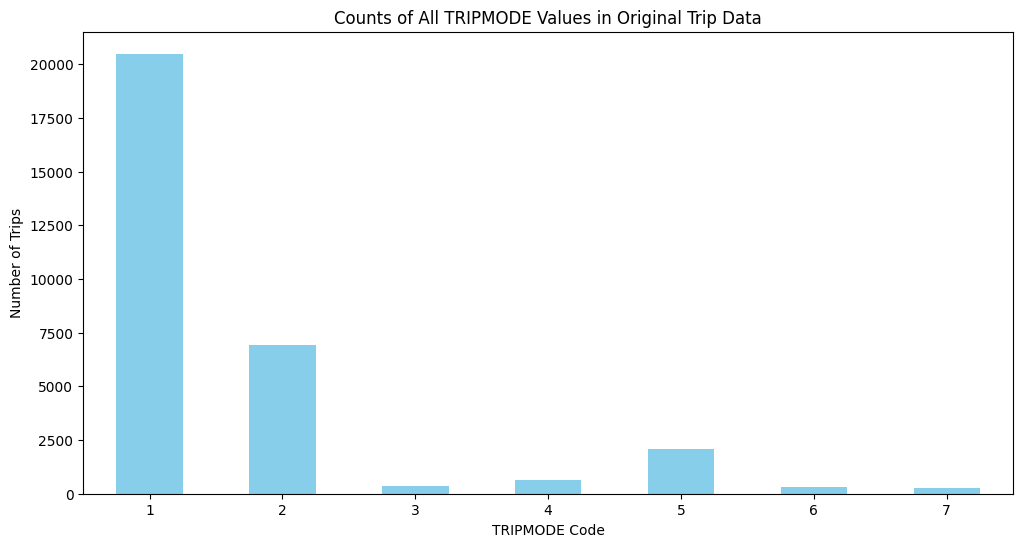

In [114]:
import matplotlib.pyplot as plt

# Count trips per TRIPMODE
tripmode_counts = trip['TRIPMODE'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12,6))
tripmode_counts.plot(kind='bar', color='skyblue')
plt.xlabel('TRIPMODE Code')
plt.ylabel('Number of Trips')
plt.title('Counts of All TRIPMODE Values in Original Trip Data')
plt.xticks(rotation=0)
plt.show()


it seems theres no school buses


In [115]:
for col in ['TRIPMODE', 'TRPTRANS', 'WHYTRP90']:
    if col in trip.columns:
        print(f"{col} unique values: {sorted(trip[col].dropna().unique())}")


TRIPMODE unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
TRPTRANS unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21)]
WHYTRP90 unique values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(8), np.int64(10), np.int64(11), np.int64(99)]


nvm we were using the wrong column we good now

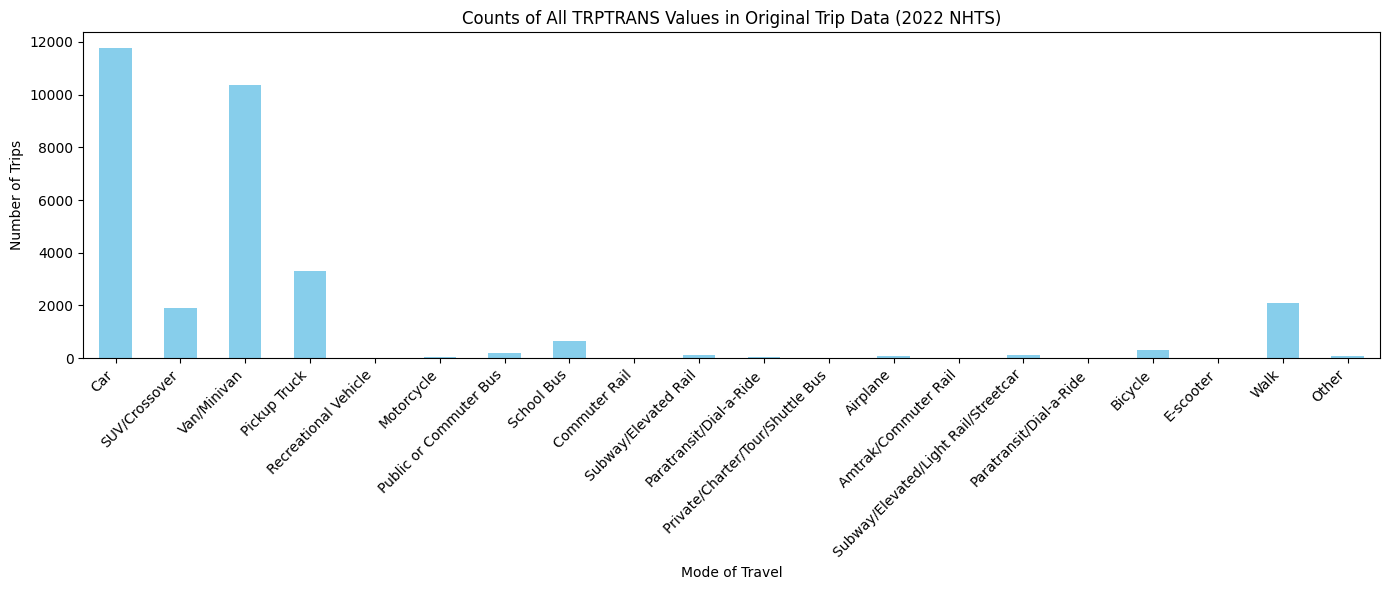

In [116]:
import matplotlib.pyplot as plt

# Map TRPTRANS codes to descriptive mode names
mode_labels = {
    1: "Car",
    2: "SUV/Crossover",
    3: "Van/Minivan",
    4: "Pickup Truck",
    6: "Recreational Vehicle",
    7: "Motorcycle",
    8: "Public or Commuter Bus",
    9: "School Bus",
    10: "Commuter Rail",
    11: "Subway/Elevated Rail",
    12: "Paratransit/Dial-a-Ride",
    13: "Private/Charter/Tour/Shuttle Bus",
    14: "Airplane",
    15: "Amtrak/Commuter Rail",
    16: "Subway/Elevated/Light Rail/Streetcar",
    17: "Paratransit/Dial-a-Ride",
    18: "Bicycle",
    19: "E-scooter",
    20: "Walk",
    21: "Other",
}

# Count trips per TRPTRANS code
trptrans_counts = trip['TRPTRANS'].value_counts().sort_index()

# Map labels
trptrans_counts.index = [mode_labels.get(code, f"Unknown ({code})") for code in trptrans_counts.index]

# Plot bar chart
plt.figure(figsize=(14,6))
trptrans_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Mode of Travel')
plt.ylabel('Number of Trips')
plt.title('Counts of All TRPTRANS Values in Original Trip Data (2022 NHTS)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


ok now lets get back to what we were doing. within the combined dataframe, lets first combine multiple trips from the same person in the same household into one row. we need to handle combination of values carefully.

first lets reorder the data set so individual peoples entries are grouped together without actually changing any content.

In [117]:
# Sort combined dataframe by HOUSEID and PERSONID
school_trips_sorted = school_trips.sort_values(by=['HOUSEID', 'PERSONID', 'TRIPID']).reset_index(drop=True)

# Inspect first few rows to confirm sorting
school_trips_sorted[['HOUSEID','PERSONID','TRIPID','WHYTO']].head(150)


HOUSEID PERSONID  TRIPID  WHYTO
0    9000013045        2       1      6
1    9000013183        3       1      6
2    9000013183        4       1      6
3    9000013183        5       1      6
4    9000013183        6       1      6
5    9000013360        4       2      6
6    9000013440        3       1      6
7    9000013509        3       1      6
8    9000013847        2       1      6
9    9000013889        3       1      6
10   9000013889        5       1      6
11   9000013896        3       1      6
12   9000014017        3       1      6
13   9000014136        3       1      6
14   9000014608        3       1      6
15   9000014723        2       1      6
16   9000014723        3       1      6
17   9000014868        3       1      6
18   9000014965        2       1      6
19   9000015086        3       1      6
20   9000015187        3       3      6
21   9000015187        4       1      6
22   9000015187        4       2      6
23   9000015187        4       3      6
24   9000015187        5       1      6
25   9000015187        5       2      6
26   9000015187        5       3      6
27   9000015310        4       1      6
28   9000015310        5       1      6
29   9000015310        6       1      6
30   9000015571        3       1      6
31   9000015626        3       1      6
32   9000015687        3       2      6
33   9000015687        4       2      6
34   9000015997        2       1      6
35   9000015997        3       1      6
36   9000016122        3       1      6
37   9000016293        1       1      6
38   9000016671        4       1      6
39   9000016723        4       1      6
40   9000016723        5       1      6
41   9000016800        2       1      6
42   9000016800        3       1      6
43   9000017260        3       1      6
44   9000017268        3       1      6
45   9000017268        4       1      6
46   9000017292        3       2      6
47   9000017410        3       1      6
48   9000017479        1       1      6
49   9000017551        3       1      6
50   9000017551        5       1      6
51   9000017571        3       1      6
52   9000017571        4       1      6
53   9000017615        3       1      6
54   9000017615        4       1      6
55   9000017916        3       1      6
56   9000017916        4       1      6
57   9000017916        5       1      6
58   9000018003        1       1      6
59   9000018003        4       1      6
60   9000018003        5       1      6
61   9000018019        3       1      6
62   9000018213        2       1      6
63   9000018213        3       1      6
64   9000018213        4       1      6
65   9000018625        3       1      6
66   9000018827        2       1      6
67   9000018895        3       1      6
68   9000018895        4       1      6
69   9000018895        5       1      6
70   9000019020        3       1      6
71   9000019099        3       1      6
72   9000045468        2       1      6
73   9000045468        2       2      6
74   9000045505        2       2      6
75   9000045527        3       1      6
76   9000045598        3       1      6
77   9000045598        4       2      6
78   9000045598        5       2      6
79   9000045698        2       1      6
80   9000045743        3       1      6
81   9000045758        3       1      6
82   9000046074        1       1      6
83   9000046074        1       2      6
84   9000046074        1       4      6
85   9000046129        3       1      6
86   9000046606        2       1      6
87   9000046648        4       1      6
88   9000046710        3       1      6
89   9000046751        4       1      6
90   9000046751        4       2      6
91   9000046751        5       1      6
92   9000046751        5       2      6
93   9000046943        3       1      6
94   9000047021        2       1      6
95   9000047021        3       2      6
96   9000047021        4       2      6
97   9000047093        2       1      6
98   9000047093        3       1      6
99   900

ok the dataset is collected by recording only one day per person. lets check if somehow theres any people who went to school twice in a day.

In [118]:
# Count number of school trips per person
trip_counts = school_trips_sorted.groupby(['HOUSEID','PERSONID']).size()
print("Number of unique persons with school trips:", trip_counts.shape[0])
print("Max number of school trips per person:", trip_counts.max())
print("Distribution of number of school trips per person:")
print(trip_counts.value_counts().sort_index())


Number of unique persons with school trips: 943
Max number of school trips per person: 3
Distribution of number of school trips per person:
1    890
2     44
3      9
Name: count, dtype: int64


ok so there are people who went to school multiple times in the same day. lets combine them. we gotta figure out how to collapse certain columns tho so heres the list of columns

In [119]:
# List all column names
column_names = school_trips_sorted.columns.tolist()
print(column_names)


['HOUSEID', 'PERSONID', 'TRIPID', 'SEQ_TRIPID', 'VEHCASEID', 'FRSTHM_TRIP', 'PARK_TRIP', 'HHMEMDRV', 'TDWKND', 'TRAVDAY_TRIP', 'LOOP_TRIP', 'DWELTIME', 'PUBTRANS', 'TRIPPURP', 'WHYFROM', 'WHYTRP1S', 'TRVLCMIN', 'STRTTIME', 'ENDTIME', 'TRPHHVEH', 'VEHID', 'TRPTRANS', 'NUMONTRP', 'ONTD_P1', 'ONTD_P2', 'ONTD_P3', 'ONTD_P4', 'ONTD_P5', 'ONTD_P6', 'ONTD_P7', 'ONTD_P8', 'ONTD_P9', 'ONTD_P10', 'NONHHCNT', 'HHACCCNT', 'WHODROVE', 'DRVR_FLG', 'PSGR_FLG', 'WHODROVE_IMP', 'PARK2_PAMOUNT', 'PARK2_PAYTYPE', 'PARK2', 'WHYTO', 'WALK', 'TRPMILES', 'WTTRDFIN', 'WTTRDFIN5D', 'WTTRDFIN2D', 'TDCASEID', 'VMT_MILE', 'GASPRICE', 'WHYTRP90', 'NUMADLT_TRIP', 'HOMEOWN_TRIP', 'RAIL_TRIP', 'CENSUS_D_TRIP', 'CENSUS_R_TRIP', 'HH_HISP_TRIP', 'DRVRCNT_TRIP', 'CDIVMSAR_TRIP', 'HHFAMINC_TRIP', 'HH_RACE_TRIP', 'HHSIZE_TRIP', 'HHVEHCNT_TRIP', 'LIF_CYC_TRIP', 'MSACAT_TRIP', 'MSASIZE_TRIP', 'URBAN_TRIP', 'URBANSIZE_TRIP', 'URBRUR_TRIP', 'TDAYDATE_TRIP', 'WRKCOUNT_TRIP', 'STRATUMID_TRIP', 'R_AGE_TRIP', 'R_SEX_TRIP', 'WORKER

ts hard to understand lets GPT some translations

In [120]:
columns = ['HOUSEID', 'PERSONID', 'TRIPID', 'SEQ_TRIPID', 'VEHCASEID', 'FRSTHM_TRIP', 'PARK_TRIP',
           'HHMEMDRV', 'TDWKND', 'TRAVDAY_TRIP', 'LOOP_TRIP', 'DWELTIME', 'PUBTRANS', 'TRIPPURP',
           'WHYFROM', 'WHYTRP1S', 'TRVLCMIN', 'STRTTIME', 'ENDTIME', 'TRPHHVEH', 'VEHID', 'TRPTRANS',
           'NUMONTRP', 'ONTD_P1', 'ONTD_P2', 'ONTD_P3', 'ONTD_P4', 'ONTD_P5', 'ONTD_P6', 'ONTD_P7',
           'ONTD_P8', 'ONTD_P9', 'ONTD_P10', 'NONHHCNT', 'HHACCCNT', 'WHODROVE', 'DRVR_FLG', 'PSGR_FLG',
           'WHODROVE_IMP', 'PARK2_PAMOUNT', 'PARK2_PAYTYPE', 'PARK2', 'WHYTO', 'WALK', 'TRPMILES',
           'WTTRDFIN', 'WTTRDFIN5D', 'WTTRDFIN2D', 'TDCASEID', 'VMT_MILE', 'GASPRICE', 'WHYTRP90',
           'NUMADLT_TRIP', 'HOMEOWN_TRIP', 'RAIL_TRIP', 'CENSUS_D_TRIP', 'CENSUS_R_TRIP', 'HH_HISP_TRIP',
           'DRVRCNT_TRIP', 'CDIVMSAR_TRIP', 'HHFAMINC_TRIP', 'HH_RACE_TRIP', 'HHSIZE_TRIP',
           'HHVEHCNT_TRIP', 'LIF_CYC_TRIP', 'MSACAT_TRIP', 'MSASIZE_TRIP', 'URBAN_TRIP', 'URBANSIZE_TRIP',
           'URBRUR_TRIP', 'TDAYDATE_TRIP', 'WRKCOUNT_TRIP', 'STRATUMID_TRIP', 'R_AGE_TRIP', 'R_SEX_TRIP',
           'WORKER_TRIP', 'DRIVER_TRIP', 'R_RACE_TRIP', 'R_HISP_TRIP', 'PROXY_TRIP', 'EDUC_TRIP',
           'PRMACT_TRIP', 'R_SEX_IMP_TRIP', 'VEHTYPE', 'HHFAMINC_IMP_TRIP', 'OBHUR', 'DBHUR', 'TRIPMODE',
           'OTHTNRNT', 'OTPPOPDN', 'OTRESDN', 'OTEEMPDN', 'OBHTNRNT', 'OBPPOPDN', 'OBRESDN', 'DTHTNRNT',
           'DTPPOPDN', 'DTRESDN', 'DTEEMPDN', 'DBHTNRNT', 'DBPPOPDN', 'DBRESDN', 'WTPERFIN', 'WTPERFIN5D',
           'WTPERFIN2D', 'R_RELAT', 'GCDWORK', 'OUTOFTWN', 'USEPUBTR', 'WHOPROXY', 'LAST30_TAXI',
           'LAST30_RDSHR', 'LAST30_ESCT', 'LAST30_PT', 'LAST30_MTRC', 'LAST30_WALK', 'LAST30_BIKE',
           'LAST30_BKSHR', 'TAXISERVICE', 'RIDESHARE22', 'ESCOOTERUSED', 'PTUSED', 'TRNPASS', 'MCTRANSIT',
           'WALKTRANSIT', 'BIKETRANSIT', 'BIKESHARE22', 'USAGE1', 'USAGE2_1', 'USAGE2_2', 'USAGE2_3',
           'USAGE2_4', 'USAGE2_5', 'USAGE2_6', 'USAGE2_7', 'USAGE2_8', 'USAGE2_9', 'USAGE2_10', 'QACSLAN1',
           'QACSLAN3', 'PAYPROF', 'EMPLOYMENT2', 'DRIVINGOCCUPATION', 'DRIVINGVEHICLE', 'WRKLOC',
           'WKFMHM22', 'WRKTRANS', 'EMPPASS', 'SCHOOL1', 'STUDE', 'SCHTYP', 'SCHOOL1C', 'SCHTRN1',
           'DELIVER', 'DELIV_GOOD', 'DELIV_FOOD', 'DELIV_GROC', 'DELIV_PERS', 'RET_HOME', 'RET_PUF',
           'RET_AMZ', 'RET_STORE', 'MEDCOND', 'MEDCOND6', 'W_CANE', 'W_WKCR', 'W_VISIMP', 'W_SCCH',
           'W_CHAIR', 'W_NONE', 'CONDTRAV', 'CONDRIDE', 'CONDNIGH', 'CONDRIVE', 'CONDPUB', 'CONDSPEC',
           'CONDSHARE', 'CONDNONE', 'CONDRF', 'PARKHOME', 'PARKHOMEAMT', 'PARKHOMEAMT_PAMOUNT',
           'PARKHOMEAMT_PAYTYPE', 'SAMEPLC', 'COV1_WK', 'COV1_SCH', 'COV1_PT', 'COV1_OHD', 'COV2_WK',
           'COV2_SCH', 'COV2_PT', 'COV2_OHD', 'CNTTDTR', 'WBHUR', 'SBHUR', 'WTHTNRNT', 'WTPPOPDN',
           'WTRESDN', 'WTEEMPDN', 'WBHTNRNT', 'WBPPOPDN', 'WBRESDN', 'STHTNRNT', 'STPPOPDN', 'STRESDN',
           'STEEMPDN', 'SBHTNRNT', 'SBPPOPDN', 'SBRESDN', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN', 'HTRESDN',
           'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN', 'WTHHFIN', 'WTHHFIN5D', 'WTHHFIN2D', 'HOMETYPE',
           'CNTTDHH', 'FLAG100', 'HHRELATD', 'PPT517', 'YOUNGCHILD', 'RESP_CNT', 'URBRUR_2010']

# Corresponding English descriptions (common ones filled, others as placeholders)
descriptions = [
    'Household ID', 'Person ID', 'Trip ID', 'Sequence Trip ID', 'Vehicle Case ID',
    'First home flag', 'Parking at trip origin', 'Household member drives', 'Weekday/Weekend flag',
    'Day of week', 'Loop trip indicator', 'Time at dwelling', 'Public transit used?', 'Trip purpose',
    'Reason from origin', 'Other reason', 'Travel time in minutes', 'Trip start time', 'Trip end time',
    'Trip household vehicle number', 'Vehicle ID', 'Mode of transportation (TRPTRANS)', 'Number of people on trip',
    'On trip person 1', 'On trip person 2', 'On trip person 3', 'On trip person 4', 'On trip person 5',
    'On trip person 6', 'On trip person 7', 'On trip person 8', 'On trip person 9', 'On trip person 10',
    'Non-household count', 'Household accessibility count', 'Who drove?', 'Driver flag', 'Passenger flag',
    'Imputed who drove', 'Parking amount', 'Parking payment type', 'Parking code', 'Reason to destination',
    'Walk indicator', 'Trip miles', 'Final weight', '5-day final weight', '2-day final weight', 'Travel diary ID',
    'Vehicle miles traveled', 'Gas price', 'Trip reason legacy', 'Number of adults in household', 'Home ownership',
    'Rail access', 'Census district', 'Census region', 'Household Hispanic origin', 'Number of drivers in household',
    'Census division/MSA', 'Household family income', 'Household race', 'Household size', 'Household vehicle count',
    'Life cycle of household', 'MSA category', 'MSA size', 'Urban flag', 'Urban size', 'Urban/Rural indicator',
    'Travel day date', 'Work count', 'Stratum ID', 'Respondent age', 'Respondent sex', 'Worker flag',
    'Driver flag', 'Respondent race', 'Respondent Hispanic origin', 'Proxy respondent flag', 'Education',
    'Primary activity', 'Sex imputed', 'Vehicle type', 'Household family income imputed', 'Outbound trip hour',
    'Domestic trip hour', 'TRIPMODE (collapsed)', 'Other trip nonresident', 'Other trip population density',
    'Other trip residence density', 'Other trip employment density', 'Outbound trip hour nonresident',
    'Outbound trip population density', 'Outbound trip residence density', 'Domestic trip hour nonresident',
    'Domestic trip population density', 'Domestic trip residence density', 'Domestic trip employment density',
    'Domestic trip hour nonresident', 'Domestic trip population density', 'Domestic trip residence density',
    'Person final weight', 'Person final 5-day weight', 'Person final 2-day weight', 'Respondent relationship',
    'Distance to work', 'Out of town?', 'Used public transit?', 'Who was proxy?', 'Taxi last 30 days',
    'Rideshare last 30 days', 'E-scooter last 30 days', 'Public transit last 30 days', 'Motor transit last 30 days',
    'Walk last 30 days', 'Bike last 30 days', 'Bikeshare last 30 days', 'Taxi service usage', 'Rideshare usage',
    'E-scooter used?', 'Public transit used?', 'Transit pass', 'Motorized transit used', 'Walk to transit',
    'Bike to transit', 'Bikeshare usage', 'Usage 1', 'Usage 2-1', 'Usage 2-2', 'Usage 2-3', 'Usage 2-4',
    'Usage 2-5', 'Usage 2-6', 'Usage 2-7', 'Usage 2-8', 'Usage 2-9', 'Usage 2-10', 'Quality of access 1',
    'Quality of access 3', 'Payment profile', 'Employment type', 'Driving occupation', 'Driving vehicle',
    'Work location', 'Work from home flag', 'Work transport mode', 'Employer provided pass', 'School 1',
    'Student flag', 'School type', 'School 1 code', 'School trip 1', 'Delivery flag', 'Delivery goods',
    'Delivery food', 'Delivery groceries', 'Delivery personal items', 'Return home', 'Return via PUF',
    'Return via Amazon', 'Return to store', 'Medical condition', 'Medical condition 6', 'Uses cane',
    'Uses walker/crutches', 'Visual impairment', 'Uses school chair', 'Uses wheelchair', 'No mobility aid',
    'Condition travel', 'Condition ride', 'Condition night travel', 'Condition drive', 'Condition public transit',
    'Condition special', 'Condition share', 'Condition none', 'Condition refused', 'Park home', 'Park home amount',
    'Park home amount (paid)', 'Park home amount (payment type)', 'Same place indicator', 'Coverage 1 work',
    'Coverage 1 school', 'Coverage 1 public transit', 'Coverage 1 other household', 'Coverage 2 work',
    'Coverage 2 school', 'Coverage 2 public transit', 'Coverage 2 other household', 'Count of trips',
    'Weekday bus hours', 'School bus hours', 'Weight to home trip', 'Weight to population', 'Weight to residence',
    'Weight to employment', 'Bus weekday hours', 'Bus population', 'Bus residence', 'Street hours weekday',
    'Street population', 'Street residence', 'Street employment', 'School bus weekday hours',
    'School bus population', 'School bus residence', 'Home bus hours', 'Home street hours weekday',
    'Home street population', 'Home street residence', 'Person final weight', 'Person 5-day weight',
    'Person 2-day weight', 'Home type', 'Count of trips per household', 'Flag 100', 'Household relationship',
    'Population 5-17', 'Young children in household', 'Respondent count', 'Urban/Rural 2010'
]

# Make sure the descriptions list matches columns
if len(descriptions) < len(columns):
    descriptions += ["TBD"] * (len(columns) - len(descriptions))
elif len(descriptions) > len(columns):
    descriptions = descriptions[:len(columns)]

# Make dataframe
column_translation = pd.DataFrame({
    'Column_Name': columns,
    'Description': descriptions
})

# Display all rows in a dataframe
pd.set_option('display.max_rows', None)

# Now display the dataframe
column_translation


Column_Name                        Description
0                HOUSEID                       Household ID
1               PERSONID                          Person ID
2                 TRIPID                            Trip ID
3             SEQ_TRIPID                   Sequence Trip ID
4              VEHCASEID                    Vehicle Case ID
5            FRSTHM_TRIP                    First home flag
6              PARK_TRIP             Parking at trip origin
7               HHMEMDRV            Household member drives
8                 TDWKND               Weekday/Weekend flag
9           TRAVDAY_TRIP                        Day of week
10             LOOP_TRIP                Loop trip indicator
11              DWELTIME                   Time at dwelling
12              PUBTRANS               Public transit used?
13              TRIPPURP                       Trip purpose
14               WHYFROM                 Reason from origin
15              WHYTRP1S                       Other reason
16              TRVLCMIN             Travel time in minutes
17              STRTTIME                    Trip start time
18               ENDTIME                      Trip end time
19              TRPHHVEH      Trip household vehicle number
20                 VEHID                         Vehicle ID
21              TRPTRANS  Mode of transportation (TRPTRANS)
22              NUMONTRP           Number of people on trip
23               ONTD_P1                   On trip person 1
24               ONTD_P2                   On trip person 2
25               ONTD_P3                   On trip person 3
26               ONTD_P4                   On trip person 4
27               ONTD_P5                   On trip person 5
28               ONTD_P6                   On trip person 6
29               ONTD_P7                   On trip person 7
30               ONTD_P8                   On trip person 8
31               ONTD_P9                   On trip person 9
32              ONTD_P10                  On trip person 10
33              NONHHCNT                Non-household count
34              HHACCCNT      Household accessibility count
35              WHODROVE                         Who drove?
36              DRVR_FLG                        Driver flag
37              PSGR_FLG                     Passenger flag
38          WHODROVE_IMP                  Imputed who drove
39         PARK2_PAMOUNT                     Parking amount
40         PARK2_PAYTYPE               Parking payment type
41                 PARK2                       Parking code
42                 WHYTO              Reason to destination
43                  WALK                     Walk indicator
44              TRPMILES                         Trip miles
45              WTTRDFIN                       Final weight
46            WTTRDFIN5D                 5-day final weight
47            WTTRDFIN2D                 2-day final weight
48              TDCASEID                    Travel diary ID
49              VMT_MILE             Vehicle miles traveled
50              GASPRICE                          Gas price
51              WHYTRP90                 Trip reason legacy
52          NUMADLT_TRIP      Number of adults in household
53          HOMEOWN_TRIP                     Home ownership
54             RAIL_TRIP                        Rail access
55         CENSUS_D_TRIP                    Census district
56         CENSUS_R_TRIP                      Census region
57          HH_HISP_TRIP          Household Hispanic origin
58          DRVRCNT_TRIP     Number of drivers in household
59         CDIVMSAR_TRIP                Census division/MSA
60         HHFAMINC_TRIP            Household family income
61          HH_RACE_TRIP                     Household race
62           HHSIZE_TRIP                     Household size
63         HHVEHCNT_TRIP            Household vehicle count
64          LIF_CYC_TRIP            Life cycle of household
65           MSACAT_TRIP                       MSA ca

CLEARLY we do NOT need all this. FIRSTLY we can get rid of anything thats derived/repeated. again im not going through all 200+ of these, so lets have GPT do it. some examples tho are things like the ONTD columns, which are useless since those people will have their own entries.

i told GPT that exact thing, heres what it says:

**Here are the obvious categories to drop:**

**Trip-person specifics that can’t be inferred publicly:**

ONTD_P1 … ONTD_P10 (on-trip person IDs)

TRAVDAY_TRIP, SEQ_TRIPID, TRIPID, VEHCASEID, TRPHHVEH (trip-specific IDs)

WHYFROM, WHYTRP1S, TRPTRANS, TRIPMODE, TRIPPURP (trip purpose/mode info)

STRTTIME, ENDTIME, TRVLCMIN, DWELTIME, PUBTRANS, WALK

**Delivery/return columns:**

DELIVER, DELIV_GOOD, DELIV_FOOD, DELIV_GROC, DELIV_PERS

RET_HOME, RET_PUF, RET_AMZ, RET_STORE

**Weighting / survey specifics:**

WTTRDFIN, WTTRDFIN5D, WTTRDFIN2D, WTPERFIN, WTPERFIN5D, WTPERFIN2D

TDCASEID, STRATUMID_TRIP

**Highly specific trip or employment details:**

OBHUR, DBHUR, OTHTNRNT, OTPPOPDN, OTRESDN, OTEEMPDN, OBHTNRNT, etc.

USAGE1, USAGE2_*, QACSLAN1, QACSLAN3, PAYPROF, WRKLOC, WRKTRANS, EMPPASS

**Miscellaneous personal survey specifics:**

PROXY_TRIP, PRMACT_TRIP, R_SEX_IMP_TRIP, LAST30_*, TAXISERVICE, RIDESHARE22, ESCOOTERUSED, PTUSED, TRNPASS, MCTRANSIT, WALKTRANSIT, BIKETRANSIT, BIKESHARE22

In [121]:
# Columns to drop
drop_columns = [
    'ONTD_P1','ONTD_P2','ONTD_P3','ONTD_P4','ONTD_P5','ONTD_P6','ONTD_P7','ONTD_P8','ONTD_P9','ONTD_P10',
    'TRAVDAY_TRIP','SEQ_TRIPID','TRIPID','VEHCASEID','TRPHHVEH','WHYFROM','WHYTRP1S','TRPTRANS','TRIPMODE',
    'TRIPPURP','STRTTIME','ENDTIME','TRVLCMIN','DWELTIME','PUBTRANS','WALK',
    'DELIVER','DELIV_GOOD','DELIV_FOOD','DELIV_GROC','DELIV_PERS','RET_HOME','RET_PUF','RET_AMZ','RET_STORE',
    'WTTRDFIN','WTTRDFIN5D','WTTRDFIN2D','WTPERFIN','WTPERFIN5D','WTPERFIN2D','TDCASEID','STRATUMID_TRIP',
    'OBHUR','DBHUR','OTHTNRNT','OTPPOPDN','OTRESDN','OTEEMPDN','OBHTNRNT','OBPPOPDN','OBRESDN','DTHTNRNT',
    'DTPPOPDN','DTRESDN','DTEEMPDN','DBHTNRNT','DBPPOPDN','DBRESDN','USAGE1','USAGE2_1','USAGE2_2','USAGE2_3',
    'USAGE2_4','USAGE2_5','USAGE2_6','USAGE2_7','USAGE2_8','USAGE2_9','USAGE2_10','QACSLAN1','QACSLAN3',
    'PAYPROF','WRKLOC','WRKTRANS','EMPPASS','PROXY_TRIP','PRMACT_TRIP','R_SEX_IMP_TRIP','LAST30_TAXI',
    'LAST30_RDSHR','LAST30_ESCT','LAST30_PT','LAST30_MTRC','LAST30_WALK','LAST30_BIKE','LAST30_BKSHR',
    'TAXISERVICE','RIDESHARE22','ESCOOTERUSED','PTUSED','TRNPASS','MCTRANSIT','WALKTRANSIT','BIKETRANSIT',
    'BIKESHARE22'
]

# Drop them from column_translation
labels_df = column_translation[~column_translation['Column_Name'].isin(drop_columns)].reset_index(drop=True)

# Show remaining columns
labels_df


Column_Name                      Description
0                HOUSEID                     Household ID
1               PERSONID                        Person ID
2            FRSTHM_TRIP                  First home flag
3              PARK_TRIP           Parking at trip origin
4               HHMEMDRV          Household member drives
5                 TDWKND             Weekday/Weekend flag
6              LOOP_TRIP              Loop trip indicator
7                  VEHID                       Vehicle ID
8               NUMONTRP         Number of people on trip
9               NONHHCNT              Non-household count
10              HHACCCNT    Household accessibility count
11              WHODROVE                       Who drove?
12              DRVR_FLG                      Driver flag
13              PSGR_FLG                   Passenger flag
14          WHODROVE_IMP                Imputed who drove
15         PARK2_PAMOUNT                   Parking amount
16         PARK2_PAYTYPE             Parking payment type
17                 PARK2                     Parking code
18                 WHYTO            Reason to destination
19              TRPMILES                       Trip miles
20              VMT_MILE           Vehicle miles traveled
21              GASPRICE                        Gas price
22              WHYTRP90               Trip reason legacy
23          NUMADLT_TRIP    Number of adults in household
24          HOMEOWN_TRIP                   Home ownership
25             RAIL_TRIP                      Rail access
26         CENSUS_D_TRIP                  Census district
27         CENSUS_R_TRIP                    Census region
28          HH_HISP_TRIP        Household Hispanic origin
29          DRVRCNT_TRIP   Number of drivers in household
30         CDIVMSAR_TRIP              Census division/MSA
31         HHFAMINC_TRIP          Household family income
32          HH_RACE_TRIP                   Household race
33           HHSIZE_TRIP                   Household size
34         HHVEHCNT_TRIP          Household vehicle count
35          LIF_CYC_TRIP          Life cycle of household
36           MSACAT_TRIP                     MSA category
37          MSASIZE_TRIP                         MSA size
38            URBAN_TRIP                       Urban flag
39        URBANSIZE_TRIP                       Urban size
40           URBRUR_TRIP            Urban/Rural indicator
41         TDAYDATE_TRIP                  Travel day date
42         WRKCOUNT_TRIP                       Work count
43            R_AGE_TRIP                   Respondent age
44            R_SEX_TRIP                   Respondent sex
45           WORKER_TRIP                      Worker flag
46           DRIVER_TRIP                      Driver flag
47           R_RACE_TRIP                  Respondent race
48           R_HISP_TRIP       Respondent Hispanic origin
49             EDUC_TRIP                        Education
50               VEHTYPE                     Vehicle type
51     HHFAMINC_IMP_TRIP  Household family income imputed
52               R_RELAT          Respondent relationship
53               GCDWORK                 Distance to work
54              OUTOFTWN                     Out of town?
55              USEPUBTR             Used public transit?
56              WHOPROXY                   Who was proxy?
57           EMPLOYMENT2                  Employment type
58     DRIVINGOCCUPATION               Driving occupation
59        DRIVINGVEHICLE                  Driving vehicle
60              WKFMHM22              Work from home flag
61               SCHOOL1                         School 1
62                 STUDE                     Student flag
63                SCHTYP                      School type
64              SCHOOL1C                    School 1 code
65               SCHTRN1                    School trip 1
66               MEDCOND                Medical condition
67              MEDCOND6              Medical condition 6
68         

ok now we can refine even more which ones to drop. from looking at this, we can drop:

FRSTHM_TRIP
PARK_TRIP
TDWKND	Weekday/Weekend flag
6	LOOP_TRIP	Loop trip indicator
7	VEHID	Vehicle ID
8	NUMONTRP	Number of people on trip
9	NONHHCNT	Non-household count
10	HHACCCNT	Household accessibility count
11	WHODROVE	Who drove?
12	DRVR_FLG	Driver flag
13	PSGR_FLG	Passenger flag
14	WHODROVE_IMP	Imputed who drove
15	PARK2_PAMOUNT	Parking amount
16	PARK2_PAYTYPE	Parking payment type
17	PARK2 Parking code
VMT_MILE	Vehicle miles traveled
WHYTRP90	Trip reason legacy
RAIL_TRIP	Rail access
TDAYDATE_TRIP	Travel day date
42	WRKCOUNT_TRIP	Work count
WORKER_TRIP	Worker flag
46	DRIVER_TRIP	Driver flag
R_RELAT	Respondent relationship
53	GCDWORK	Distance to work
54	OUTOFTWN	Out of town?
55	USEPUBTR	Used public transit?
56	WHOPROXY	Who was proxy?
57	EMPLOYMENT2	Employment type
58	DRIVINGOCCUPATION	Driving occupation
59	DRIVINGVEHICLE	Driving vehicle
60	WKFMHM22	Work from home flag
MEDCOND	Medical condition
67	MEDCOND6	Medical condition 6
68	W_CANE	Uses cane
69	W_WKCR	Uses walker/crutches
70	W_VISIMP	Visual impairment
71	W_SCCH	Uses school chair
72	W_CHAIR	Uses wheelchair
73	W_NONE	No mobility aid
74	CONDTRAV	Condition travel
75	CONDRIDE	Condition ride
76	CONDNIGH	Condition night travel
77	CONDRIVE	Condition drive
78	CONDPUB	Condition public transit
79	CONDSPEC	Condition special
80	CONDSHARE	Condition share
81	CONDNONE	Condition none
82	CONDRF	Condition refused
83	PARKHOME	Park home
84	PARKHOMEAMT	Park home amount
85	PARKHOMEAMT_PAMOUNT	Park home amount (paid)
86	PARKHOMEAMT_PAYTYPE	Park home amount (payment type)
87	SAMEPLC	Same place indicator
88	COV1_WK	Coverage 1 work
89	COV1_SCH	Coverage 1 school
90	COV1_PT	Coverage 1 public transit
91	COV1_OHD	Coverage 1 other household
92	COV2_WK	Coverage 2 work
93	COV2_SCH	Coverage 2 school
94	COV2_PT	Coverage 2 public transit
95	COV2_OHD	Coverage 2 other household
96	CNTTDTR	Count of trips
97	WBHUR	Weekday bus hours
HTEEMPDN	Person final weight
118	HBHTNRNT	Person 5-day weight
119	HBPPOPDN	Person 2-day weight
WTHHFIN	Count of trips per household
122	WTHHFIN5D	Flag 100
FLAG100	Respondent count
127	HHRELATD	Urban/Rural 2010
128	PPT517	TBD
RESP_CNT	TBD


In [122]:
# Additional columns to drop
more_drop_columns = [
    'FRSTHM_TRIP', 'PARK_TRIP', 'TDWKND', 'LOOP_TRIP', 'VEHID', 'NUMONTRP', 'NONHHCNT', 'HHACCCNT',
    'WHODROVE','DRVR_FLG','PSGR_FLG','WHODROVE_IMP','PARK2_PAMOUNT','PARK2_PAYTYPE','PARK2',
    'VMT_MILE','WHYTRP90','RAIL_TRIP','TDAYDATE_TRIP','WRKCOUNT_TRIP','WORKER_TRIP','DRIVER_TRIP',
    'R_RELAT','GCDWORK','OUTOFTWN','USEPUBTR','WHOPROXY','EMPLOYMENT2','DRIVINGOCCUPATION',
    'DRIVINGVEHICLE','WKFMHM22','MEDCOND','MEDCOND6','W_CANE','W_WKCR','W_VISIMP','W_SCCH','W_CHAIR',
    'W_NONE','CONDTRAV','CONDRIDE','CONDNIGH','CONDRIVE','CONDPUB','CONDSPEC','CONDSHARE','CONDNONE',
    'CONDRF','PARKHOME','PARKHOMEAMT','PARKHOMEAMT_PAMOUNT','PARKHOMEAMT_PAYTYPE','SAMEPLC',
    'COV1_WK','COV1_SCH','COV1_PT','COV1_OHD','COV2_WK','COV2_SCH','COV2_PT','COV2_OHD','CNTTDTR',
    'WBHUR','HTEEMPDN','HBHTNRNT','HBPPOPDN','WTHHFIN','WTHHFIN5D','FLAG100','HHRELATD','PPT517','RESP_CNT'
]

# Combine with previous drop list
total_drop_columns = drop_columns + more_drop_columns

# Create new cleaned labels dataframe
clean_labels_df = column_translation[~column_translation['Column_Name'].isin(total_drop_columns)].reset_index(drop=True)

# Show remaining columns
clean_labels_df


Column_Name                      Description
0             HOUSEID                     Household ID
1            PERSONID                        Person ID
2            HHMEMDRV          Household member drives
3               WHYTO            Reason to destination
4            TRPMILES                       Trip miles
5            GASPRICE                        Gas price
6        NUMADLT_TRIP    Number of adults in household
7        HOMEOWN_TRIP                   Home ownership
8       CENSUS_D_TRIP                  Census district
9       CENSUS_R_TRIP                    Census region
10       HH_HISP_TRIP        Household Hispanic origin
11       DRVRCNT_TRIP   Number of drivers in household
12      CDIVMSAR_TRIP              Census division/MSA
13      HHFAMINC_TRIP          Household family income
14       HH_RACE_TRIP                   Household race
15        HHSIZE_TRIP                   Household size
16      HHVEHCNT_TRIP          Household vehicle count
17       LIF_CYC_TRIP          Life cycle of household
18        MSACAT_TRIP                     MSA category
19       MSASIZE_TRIP                         MSA size
20         URBAN_TRIP                       Urban flag
21     URBANSIZE_TRIP                       Urban size
22        URBRUR_TRIP            Urban/Rural indicator
23         R_AGE_TRIP                   Respondent age
24         R_SEX_TRIP                   Respondent sex
25        R_RACE_TRIP                  Respondent race
26        R_HISP_TRIP       Respondent Hispanic origin
27          EDUC_TRIP                        Education
28            VEHTYPE                     Vehicle type
29  HHFAMINC_IMP_TRIP  Household family income imputed
30            SCHOOL1                         School 1
31              STUDE                     Student flag
32             SCHTYP                      School type
33           SCHOOL1C                    School 1 code
34            SCHTRN1                    School trip 1
35              SBHUR                 School bus hours
36           WTHTNRNT              Weight to home trip
37           WTPPOPDN             Weight to population
38            WTRESDN              Weight to residence
39           WTEEMPDN             Weight to employment
40           WBHTNRNT                Bus weekday hours
41           WBPPOPDN                   Bus population
42            WBRESDN                    Bus residence
43           STHTNRNT             Street hours weekday
44           STPPOPDN                Street population
45            STRESDN                 Street residence
46           STEEMPDN                Street employment
47           SBHTNRNT         School bus weekday hours
48           SBPPOPDN            School bus population
49            SBRESDN             School bus residence
50              HBHUR                   Home bus hours
51           HTHTNRNT        Home street hours weekday
52           HTPPOPDN           Home street population
53            HTRESDN            Home street residence
54            HBRESDN                        Home type
55          WTHHFIN2D           Household relationship
56           HOMETYPE                  Population 5-17
57            CNTTDHH      Young children in household
58         YOUNGCHILD                              TBD
59        URBRUR_2010                              TBD

ok we still have way more features than we could possibly gather from public data for a house. im gonna skip ahead a little and give you around 20-30 final features

In [123]:
# List of feasible columns including identifiers
feasible_columns = [
    'HOUSEID', 'PERSONID',   # identifiers
    'TRPMILES', 'GASPRICE', 'NUMADLT_TRIP', 'HOMEOWN_TRIP',
    'CENSUS_D_TRIP', 'CENSUS_R_TRIP', 'HH_HISP_TRIP', 'DRVRCNT_TRIP',
    'CDIVMSAR_TRIP', 'HHFAMINC_TRIP', 'HHFAMINC_IMP_TRIP', 'HH_RACE_TRIP',
    'HHSIZE_TRIP', 'HHVEHCNT_TRIP', 'LIF_CYC_TRIP', 'MSACAT_TRIP', 'MSASIZE_TRIP',
    'URBAN_TRIP', 'URBANSIZE_TRIP', 'URBRUR_TRIP', 'SCHOOL1', 'STUDE', 'SCHTYP',
    'SCHOOL1C', 'HBRESDN', 'HOMETYPE', 'CNTTDHH', 'YOUNGCHILD', 'URBRUR_2010', 'TRPTRANS'
]

# Filter the dataframe
school_trips_filtered = school_trips_sorted[feasible_columns].copy()

# Preview
print("Filtered dataframe shape:", school_trips_filtered.shape)
school_trips_filtered.head()



Filtered dataframe shape: (1005, 32)


HOUSEID PERSONID  TRPMILES  GASPRICE  NUMADLT_TRIP  HOMEOWN_TRIP  \
0  9000013045        2  6.073959     355.1             2             3   
1  9000013183        3  1.351771     367.2             2             1   
2  9000013183        4  1.403356     367.2             2             1   
3  9000013183        5  1.403356     367.2             2             1   
4  9000013183        6  1.540087     367.2             2             1   

   CENSUS_D_TRIP  CENSUS_R_TRIP  HH_HISP_TRIP  DRVRCNT_TRIP  ...  SCHOOL1  \
0              1              1             2             1  ...        1   
1              1              1             2             2  ...        1   
2              1              1             2             2  ...        1   
3              1              1             2             2  ...        1   
4              1              1             2             2  ...        1   

   STUDE  SCHTYP  SCHOOL1C  HBRESDN  HOMETYPE  CNTTDHH  YOUNGCHILD  \
0      4      -1         1        6         3        8           0   
1      1       1        -1        2         1       22           0   
2      1       1        -1        2         1       22           0   
3      1       1        -1        2         1       22           0   
4      1       1        -1        2         1       22           0   

   URBRUR_2010  TRPTRANS  
0            1         1  
1            1        20  
2            1        18  
3            1        18  
4            1         2  

[5 rows x 32 columns]

In [124]:
# Re-encode the TRPTRANS column to indicate "needs school bus"
# Original column: TRPTRANS
# Rule: 9 → 1 (needs school bus), everything else → 0

school_trips_filtered['NEEDS_SCHOOL_BUS'] = school_trips_filtered['TRPTRANS'].apply(lambda x: 1 if x == 9 else 0)

# Optional: drop the original TRPTRANS column if no longer needed
school_trips_filtered = school_trips_filtered.drop(columns=['TRPTRANS'])

# Verify changes
school_trips_filtered[['NEEDS_SCHOOL_BUS']].head(30)

NEEDS_SCHOOL_BUS
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  1
10                 0
11                 1
12                 0
13                 1
14                 0
15                 1
16                 1
17                 1
18                 0
19                 0
20                 1
21                 1
22                 1
23                 1
24                 1
25                 1
26                 1
27                 1
28                 1
29                 1

VALUE LABEL DESCRIPTION
-1 Valid Skip Input during data processing when
question is appropriately skipped,
meaning by default no value exists
-9 Not Ascertained Input during data processing when
question is inappropriately skipped,
and no value exists
-7 I Prefer Not to Answer Input by the respondent as a valid
answer choice
-8 I Don’t Know Input by the respondent as a valid
answer choice

we can use this to check for "null values" and filter out accordingly

In [125]:
# Define the nonresponse codes
nonresponse_codes = [-1, -7, -8, -9]

# Initialize a dataframe to store counts
nonresponse_counts = pd.DataFrame(columns=['Column_Name', '-1', '-7', '-8', '-9'])

# Loop through each column and count nonresponse values
for col in school_trips_filtered.columns:
    counts = school_trips_filtered[col].isin(nonresponse_codes).groupby(school_trips_filtered[col]).sum()
    row = {
        'Column_Name': col,
        '-1': (school_trips_filtered[col] == -1).sum(),
        '-7': (school_trips_filtered[col] == -7).sum(),
        '-8': (school_trips_filtered[col] == -8).sum(),
        '-9': (school_trips_filtered[col] == -9).sum()
    }
    nonresponse_counts = pd.concat([nonresponse_counts, pd.DataFrame([row])], ignore_index=True)

# Show counts
nonresponse_counts


Column_Name   -1  -7 -8 -9
0             HOUSEID    0   0  0  0
1            PERSONID    0   0  0  0
2            TRPMILES    0   0  0  0
3            GASPRICE    0   0  0  0
4        NUMADLT_TRIP    0   0  0  0
5        HOMEOWN_TRIP    0   0  0  0
6       CENSUS_D_TRIP    0   0  0  0
7       CENSUS_R_TRIP    0   0  0  0
8        HH_HISP_TRIP    0   0  0  0
9        DRVRCNT_TRIP    0   0  0  0
10      CDIVMSAR_TRIP    0   0  0  0
11      HHFAMINC_TRIP    0  14  0  0
12  HHFAMINC_IMP_TRIP    0   0  0  0
13       HH_RACE_TRIP    0   0  0  0
14        HHSIZE_TRIP    0   0  0  0
15      HHVEHCNT_TRIP    0   0  0  0
16       LIF_CYC_TRIP    0   0  0  0
17        MSACAT_TRIP    0   0  0  0
18       MSASIZE_TRIP    0   0  0  0
19         URBAN_TRIP    0   0  0  0
20     URBANSIZE_TRIP    0   0  0  0
21        URBRUR_TRIP    0   0  0  0
22            SCHOOL1    0   0  0  1
23              STUDE   11   0  0  4
24             SCHTYP  130   0  0  1
25           SCHOOL1C  890   0  0  0
26            HBRESDN    0   0  0  9
27           HOMETYPE    0   0  0  0
28            CNTTDHH    0   0  0  0
29         YOUNGCHILD    0   0  0  0
30        URBRUR_2010    0   0  0  0
31   NEEDS_SCHOOL_BUS    0   0  0  0

ok cool so that means we should drop SCHOOL1C.

In [126]:
# Columns to drop
cols_to_drop = ['SCHOOL1C']

# Drop the columns
school_trips_filtered = school_trips_filtered.drop(columns=cols_to_drop)


In [127]:
# Inspect the first few rows to confirm
school_trips_filtered.head()

HOUSEID PERSONID  TRPMILES  GASPRICE  NUMADLT_TRIP  HOMEOWN_TRIP  \
0  9000013045        2  6.073959     355.1             2             3   
1  9000013183        3  1.351771     367.2             2             1   
2  9000013183        4  1.403356     367.2             2             1   
3  9000013183        5  1.403356     367.2             2             1   
4  9000013183        6  1.540087     367.2             2             1   

   CENSUS_D_TRIP  CENSUS_R_TRIP  HH_HISP_TRIP  DRVRCNT_TRIP  ...  URBRUR_TRIP  \
0              1              1             2             1  ...            1   
1              1              1             2             2  ...            1   
2              1              1             2             2  ...            1   
3              1              1             2             2  ...            1   
4              1              1             2             2  ...            1   

   SCHOOL1  STUDE  SCHTYP  HBRESDN  HOMETYPE  CNTTDHH  YOUNGCHILD  \
0        1      4      -1        6         3        8           0   
1        1      1       1        2         1       22           0   
2        1      1       1        2         1       22           0   
3        1      1       1        2         1       22           0   
4        1      1       1        2         1       22           0   

   URBRUR_2010  NEEDS_SCHOOL_BUS  
0            1                 0  
1            1                 0  
2            1                 0  
3            1                 0  
4            1                 0  

[5 rows x 31 columns]

ok real quick before doing one hot encoding lets merge entrues of multiple school trips from the same people

In [128]:
# Columns to take first value for aggregation
first_cols = [col for col in school_trips_filtered.columns if col not in ['TRPMILES', 'HOUSEID', 'PERSONID']]

# Aggregate
school_trips_agg = school_trips_filtered.groupby(['HOUSEID', 'PERSONID']).agg(
    {**{col: 'first' for col in first_cols},  # first value for categorical/static info
     'TRPMILES': 'median'}                    # median for distance
).reset_index()

print("Aggregated dataframe shape:", school_trips_agg.shape)
school_trips_agg.head()


Aggregated dataframe shape: (943, 31)


HOUSEID PERSONID  GASPRICE  NUMADLT_TRIP  HOMEOWN_TRIP  CENSUS_D_TRIP  \
0  9000013045        2     355.1             2             3              1   
1  9000013183        3     367.2             2             1              1   
2  9000013183        4     367.2             2             1              1   
3  9000013183        5     367.2             2             1              1   
4  9000013183        6     367.2             2             1              1   

   CENSUS_R_TRIP  HH_HISP_TRIP  DRVRCNT_TRIP  CDIVMSAR_TRIP  ...  SCHOOL1  \
0              1             2             1             11  ...        1   
1              1             2             2             13  ...        1   
2              1             2             2             13  ...        1   
3              1             2             2             13  ...        1   
4              1             2             2             13  ...        1   

   STUDE  SCHTYP  HBRESDN  HOMETYPE  CNTTDHH  YOUNGCHILD  URBRUR_2010  \
0      4      -1        6         3        8           0            1   
1      1       1        2         1       22           0            1   
2      1       1        2         1       22           0            1   
3      1       1        2         1       22           0            1   
4      1       1        2         1       22           0            1   

   NEEDS_SCHOOL_BUS  TRPMILES  
0                 0  6.073959  
1                 0  1.351771  
2                 0  1.403356  
3                 0  1.403356  
4                 0  1.540087  

[5 rows x 31 columns]

lets rename trpmiles as distance from school

In [129]:
# Rename TRPMILES to DISTANCE_FROM_SCHOOL
school_trips_agg.rename(columns={'TRPMILES': 'DISTANCE_FROM_SCHOOL'}, inplace=True)

school_trips_agg[['HOUSEID', 'PERSONID', 'DISTANCE_FROM_SCHOOL']].head()

HOUSEID PERSONID  DISTANCE_FROM_SCHOOL
0  9000013045        2              6.073959
1  9000013183        3              1.351771
2  9000013183        4              1.403356
3  9000013183        5              1.403356
4  9000013183        6              1.540087

now we can finally one hot encode everything. here is the codebook with all of the codes that the dataset uses for each categorical variable: https://nhts.ornl.gov/assets/2022/doc/codebook.pdf?utm_source=chatgpt.com

lets download it and parse it to create one hot columns with appropriate names.

In [130]:
codebook_df = pd.read_excel('codebook.xlsx')
codebook_df.head()

Name                                              Label Type  Length  \
0  CDIVMSAR  Grouping of household by combination of Census...    C     2.0   
1       NaN                                                NaN  NaN     NaN   
2       NaN                                                NaN  NaN     NaN   
3       NaN                                                NaN  NaN     NaN   
4       NaN                                                NaN  NaN     NaN   

                                        Code / Range  Frequency      Weighted  
0  11=New England MSA/CMSA of 1 million+ with hea...        161  2.066163e+06  
1  12=New England MSA/CMSA of 1 million+ w/o heav...         51  7.035232e+05  
2          13=New England MSA of less than 1 million        208  3.135078e+06  
3                       14=New England Not in an MSA         19  2.219983e+05  
4  21=Mid-Atlantic MSA/CMSA of 1 million+ with he...        468  8.330759e+06

In [131]:
# Forward fill the 'Name' column so each code row knows its variable
codebook_df['Name'] = codebook_df['Name'].ffill()
codebook_df.head()

Name                                              Label Type  Length  \
0  CDIVMSAR  Grouping of household by combination of Census...    C     2.0   
1  CDIVMSAR                                                NaN  NaN     NaN   
2  CDIVMSAR                                                NaN  NaN     NaN   
3  CDIVMSAR                                                NaN  NaN     NaN   
4  CDIVMSAR                                                NaN  NaN     NaN   

                                        Code / Range  Frequency      Weighted  
0  11=New England MSA/CMSA of 1 million+ with hea...        161  2.066163e+06  
1  12=New England MSA/CMSA of 1 million+ w/o heav...         51  7.035232e+05  
2          13=New England MSA of less than 1 million        208  3.135078e+06  
3                       14=New England Not in an MSA         19  2.219983e+05  
4  21=Mid-Atlantic MSA/CMSA of 1 million+ with he...        468  8.330759e+06

In [132]:
# Step 2: Keep only the relevant columns
codebook_df = codebook_df[['Name', 'Code / Range']]

# Step 3: Get your dataset’s column names
school_trip_cols = school_trips_agg.columns  # or whatever your current df is called

# Step 4: Clean up names to match between codebook and your df
# The codebook may use names like 'HHFAMINC' while your df uses 'HHFAMINC_TRIP'
# So we match ignoring trailing suffixes like '_TRIP'
base_names = [c.replace('_TRIP', '') for c in school_trip_cols]

# Step 5: Filter the codebook so we only keep rows whose Name matches one of these
filtered_codebook = codebook_df[codebook_df['Name'].isin(base_names)].copy()

# Step 6: Display the first few rows to confirm
filtered_codebook.head(20)

Name                                       Code / Range
0   CDIVMSAR  11=New England MSA/CMSA of 1 million+ with hea...
1   CDIVMSAR  12=New England MSA/CMSA of 1 million+ w/o heav...
2   CDIVMSAR          13=New England MSA of less than 1 million
3   CDIVMSAR                       14=New England Not in an MSA
4   CDIVMSAR  21=Mid-Atlantic MSA/CMSA of 1 million+ with he...
5   CDIVMSAR  22=Mid-Atlantic MSA/CMSA of 1 million+ w/o hea...
6   CDIVMSAR         23=Mid-Atlantic MSA of less than 1 million
7   CDIVMSAR                      24=Mid-Atlantic Not in an MSA
8   CDIVMSAR  31=East North Central MSA/CMSA of 1 million+ w...
9   CDIVMSAR  32=East North Central MSA/CMSA of 1 million+ w...
10  CDIVMSAR   33=East North Central MSA of less than 1 million
11  CDIVMSAR                34=East North Central Not in an MSA
12  CDIVMSAR  42=West North Central MSA/CMSA of 1 million+ w...
13  CDIVMSAR   43=West North Central MSA of less than 1 million
14  CDIVMSAR                44=West North Central Not in an MSA
15  CDIVMSAR  51=South Atlantic MSA/CMSA of 1 million+ with ...
16  CDIVMSAR  52=South Atlantic MSA/CMSA of 1 million+ w/o h...
17  CDIVMSAR       53=South Atlantic MSA of less than 1 million
18  CDIVMSAR                    54=South Atlantic Not in an MSA
19  CDIVMSAR  62=East South Central MSA/CMSA of 1 million+ w...

In [133]:
filtered_codebook

Name                                       Code / Range
0        CDIVMSAR  11=New England MSA/CMSA of 1 million+ with hea...
1        CDIVMSAR  12=New England MSA/CMSA of 1 million+ w/o heav...
2        CDIVMSAR          13=New England MSA of less than 1 million
3        CDIVMSAR                       14=New England Not in an MSA
4        CDIVMSAR  21=Mid-Atlantic MSA/CMSA of 1 million+ with he...
5        CDIVMSAR  22=Mid-Atlantic MSA/CMSA of 1 million+ w/o hea...
6        CDIVMSAR         23=Mid-Atlantic MSA of less than 1 million
7        CDIVMSAR                      24=Mid-Atlantic Not in an MSA
8        CDIVMSAR  31=East North Central MSA/CMSA of 1 million+ w...
9        CDIVMSAR  32=East North Central MSA/CMSA of 1 million+ w...
10       CDIVMSAR   33=East North Central MSA of less than 1 million
11       CDIVMSAR                34=East North Central Not in an MSA
12       CDIVMSAR  42=West North Central MSA/CMSA of 1 million+ w...
13       CDIVMSAR   43=West North Central MSA of less than 1 million
14       CDIVMSAR                44=West North Central Not in an MSA
15       CDIVMSAR  51=South Atlantic MSA/CMSA of 1 million+ with ...
16       CDIVMSAR  52=South Atlantic MSA/CMSA of 1 million+ w/o h...
17       CDIVMSAR       53=South Atlantic MSA of less than 1 million
18       CDIVMSAR                    54=South Atlantic Not in an MSA
19       CDIVMSAR  62=East South Central MSA/CMSA of 1 million+ w...
20       CDIVMSAR   63=East South Central MSA of less than 1 million
21       CDIVMSAR                64=East South Central Not in an MSA
22       CDIVMSAR  72=West South Central MSA/CMSA of 1 million+ w...
23       CDIVMSAR   73=West South Central MSA of less than 1 million
24       CDIVMSAR                74=West South Central Not in an MSA
25       CDIVMSAR  82=Mountain MSA/CMSA of 1 million+ w/o heavy rail
26       CDIVMSAR             83=Mountain MSA of less than 1 million
27       CDIVMSAR                          84=Mountain Not in an MSA
28       CDIVMSAR  91=Pacific MSA/CMSA of 1 million+ with heavy rail
29       CDIVMSAR   92=Pacific MSA/CMSA of 1 million+ w/o heavy rail
30       CDIVMSAR              93=Pacific MSA of less than 1 million
31       CDIVMSAR                           94=Pacific Not in an MSA
32       CENSUS_D                                     01=New England
33       CENSUS_D                                 02=Middle Atlantic
34       CENSUS_D                              03=East North Central
35       CENSUS_D                              04=West North Central
36       CENSUS_D                                  05=South Atlantic
37       CENSUS_D                              06=East South Central
38       CENSUS_D                              07=West South Central
39       CENSUS_D                                        08=Mountain
40       CENSUS_D                                         09=Pacific
41       CENSUS_R                                       01=Northeast
42       CENSUS_R                                         02=Midwest
43       CENSUS_R                                           03=South
44       CENSUS_R                                            04=West
45        CNTTDHH                                     Responses=0-45
46        DRVRCNT                                                  0
47        DRVRCNT                                                  1
48        DRVRCNT                                                  2
49        DRVRCNT                                                  3
50        DRVRCNT                                                  4
51        DRVRCNT                                                  5
52        DRVRCNT                                                  6
53        DRVRCNT                                                  7
81        HBRESDN                                 -9=Not ascertained
82        HBRESDN                                            01=0-99
83        HBRESDN                                         02=100-499
84        H

ok it looks like we can remove drvrcnt, hhfaminc_imp, and hhsize, and hhvehcnt, and numadlt, and youngchild, since these are all not categorical variables. take them out.a lso take out hhfaminc_imp from the main dataset as a column

In [134]:
# list of non-categorical variables to drop
non_categorical = ['DRVRCNT', 'HHFAMINC_IMP', 'HHSIZE', 'HHVEHCNT', 'NUMADLT', 'YOUNGCHILD']

# 1️⃣ Remove these from the codebook subset
codebook_df = codebook_df[~codebook_df['Name'].isin(non_categorical)]

# 2️⃣ Also drop HHFAMINC_IMP from the main dataset
school_trips_agg = school_trips_agg.drop(columns=['HHFAMINC_IMP'], errors='ignore')

# 3️⃣ Confirm the filtered codebook
codebook_df.head()


Name                                       Code / Range
0  CDIVMSAR  11=New England MSA/CMSA of 1 million+ with hea...
1  CDIVMSAR  12=New England MSA/CMSA of 1 million+ w/o heav...
2  CDIVMSAR          13=New England MSA of less than 1 million
3  CDIVMSAR                       14=New England Not in an MSA
4  CDIVMSAR  21=Mid-Atlantic MSA/CMSA of 1 million+ with he...

lets remove the _TRIP suffix from evertyhing

In [135]:
# Remove '_TRIP' suffix from all column names
school_trips_agg.columns = [col.replace('_TRIP', '') for col in school_trips_agg.columns]
school_trips_agg.head()

HOUSEID PERSONID  GASPRICE  NUMADLT  HOMEOWN  CENSUS_D  CENSUS_R  \
0  9000013045        2     355.1        2        3         1         1   
1  9000013183        3     367.2        2        1         1         1   
2  9000013183        4     367.2        2        1         1         1   
3  9000013183        5     367.2        2        1         1         1   
4  9000013183        6     367.2        2        1         1         1   

   HH_HISP  DRVRCNT  CDIVMSAR  ...  SCHOOL1  STUDE  SCHTYP  HBRESDN  HOMETYPE  \
0        2        1        11  ...        1      4      -1        6         3   
1        2        2        13  ...        1      1       1        2         1   
2        2        2        13  ...        1      1       1        2         1   
3        2        2        13  ...        1      1       1        2         1   
4        2        2        13  ...        1      1       1        2         1   

   CNTTDHH  YOUNGCHILD  URBRUR_2010  NEEDS_SCHOOL_BUS  DISTANCE_FROM_SCHOOL  
0        8           0            1                 0              6.073959  
1       22           0            1                 0              1.351771  
2       22           0            1                 0              1.403356  
3       22           0            1                 0              1.403356  
4       22           0            1                 0              1.540087  

[5 rows x 31 columns]

rq lets see if theres any more columns to drop last minute

In [136]:
# Print all current column names
list(school_trips_agg.columns)


['HOUSEID',
 'PERSONID',
 'GASPRICE',
 'NUMADLT',
 'HOMEOWN',
 'CENSUS_D',
 'CENSUS_R',
 'HH_HISP',
 'DRVRCNT',
 'CDIVMSAR',
 'HHFAMINC',
 'HHFAMINC_IMP',
 'HH_RACE',
 'HHSIZE',
 'HHVEHCNT',
 'LIF_CYC',
 'MSACAT',
 'MSASIZE',
 'URBAN',
 'URBANSIZE',
 'URBRUR',
 'SCHOOL1',
 'STUDE',
 'SCHTYP',
 'HBRESDN',
 'HOMETYPE',
 'CNTTDHH',
 'YOUNGCHILD',
 'URBRUR_2010',
 'NEEDS_SCHOOL_BUS',
 'DISTANCE_FROM_SCHOOL']

ok sick its finally time to one hot encode. we can lowk drop the person and household identifiers now since every person is unique. plus lets drop:

houseid, personid, hhfaminc_imp, school1, stude, schtyp, hbresd, cntddh, urbrur_2010

In [137]:
columns_to_drop = [
    'HOUSEID', 'PERSONID', 'HHFAMINC_IMP', 'SCHOOL1', 'STUDE',
    'SCHTYP', 'HBRESDN', 'CNTTDHH', 'URBRUR_2010'
]

school_trips_agg = school_trips_agg.drop(columns=columns_to_drop)
school_trips_agg

GASPRICE  NUMADLT  HOMEOWN  CENSUS_D  CENSUS_R  HH_HISP  DRVRCNT  \
0       355.1        2        3         1         1        2        1   
1       367.2        2        1         1         1        2        2   
2       367.2        2        1         1         1        2        2   
3       367.2        2        1         1         1        2        2   
4       367.2        2        1         1         1        2        2   
5       360.6        4        1         2         1        2        4   
6       353.8        2        2         2         1        2        2   
7       353.8        2        1         2         1        2        3   
8       360.6        1        1         2         1        2        1   
9       353.8        3        1         2         1        2        2   
10      353.8        3        1         2         1        2        2   
11      353.8        2        1         2         1        2        2   
12      360.6        2        3         2         1        2        2   
13      334.6        2        2         3         2        2        2   
14      324.6        2        1         3         2        2        3   
15      324.6        1        2         3         2        2        1   
16      324.6        1        2         3         2        2        1   
17      334.6        2        1         3         2        2        2   
18      324.6        1        2         3         2        2        2   
19      324.6        2        1         4         2        2        2   
20      334.6        2        2         4         2        2        2   
21      334.6        2        2         4         2        2        2   
22      334.6        2        2         4         2        2        2   
23      318.3        3        1         4         2        2        3   
24      318.3        3        1         4         2        2        3   
25      318.3        3        1         4         2        2        3   
26      329.2        2        1         5         3        2        2   
27      347.4        2        1         5         3        2        2   
28      321.0        2        1         5         3        2        2   
29      321.0        2        1         5         3        2        2   
30      338.0        1        1         5         3        2        2   
31      338.0        1        1         5         3        2        2   
32      369.7        2        1         5         3        2        2   
33      329.2        2        3         5         3        2        2   
34      329.2        3        1         5         3        2        4   
35      324.6        3        1         6         3        2        3   
36      324.6        3        1         6         3        2        3   
37      325.5        1        3         6         3        2        1   
38      325.5        1        3         6         3        2        1   
39      319.4        1        3         7         3        1        1   
40      310.0        2        1         7         3        2        1   
41      310.0        2        1         7         3        2        1   
42      310.0        2        1         7         3        2        3   
43      325.5        2        1         7         3        1        2   
44      310.0        2        2         7         3        2        2   
45      308.1        2        1         7         3        2        3   
46      308.1        2        1         7         3        2        3   
47      337.7        3        3         7         3        1        2   
48      337.7        3        3         7         3        1        2   
49      319.4        2        1         7         3        2        2   
50      319.4        2        1         7         3        2        2   
51      344.0        2        1         8         4        2        2   
52      344.0        2        1         8         4        2        2   
53      344.0        2        1         8         4        2   

In [138]:
#drop these from codebook as well rq
# Drop these from codebook_df as well
codebook_df = codebook_df[~codebook_df['Name'].isin(columns_to_drop)].reset_index(drop=True)

# Check
codebook_df

Name                                       Code / Range
0     CDIVMSAR  11=New England MSA/CMSA of 1 million+ with hea...
1     CDIVMSAR  12=New England MSA/CMSA of 1 million+ w/o heav...
2     CDIVMSAR          13=New England MSA of less than 1 million
3     CDIVMSAR                       14=New England Not in an MSA
4     CDIVMSAR  21=Mid-Atlantic MSA/CMSA of 1 million+ with he...
5     CDIVMSAR  22=Mid-Atlantic MSA/CMSA of 1 million+ w/o hea...
6     CDIVMSAR         23=Mid-Atlantic MSA of less than 1 million
7     CDIVMSAR                      24=Mid-Atlantic Not in an MSA
8     CDIVMSAR  31=East North Central MSA/CMSA of 1 million+ w...
9     CDIVMSAR  32=East North Central MSA/CMSA of 1 million+ w...
10    CDIVMSAR   33=East North Central MSA of less than 1 million
11    CDIVMSAR                34=East North Central Not in an MSA
12    CDIVMSAR  42=West North Central MSA/CMSA of 1 million+ w...
13    CDIVMSAR   43=West North Central MSA of less than 1 million
14    CDIVMSAR                44=West North Central Not in an MSA
15    CDIVMSAR  51=South Atlantic MSA/CMSA of 1 million+ with ...
16    CDIVMSAR  52=South Atlantic MSA/CMSA of 1 million+ w/o h...
17    CDIVMSAR       53=South Atlantic MSA of less than 1 million
18    CDIVMSAR                    54=South Atlantic Not in an MSA
19    CDIVMSAR  62=East South Central MSA/CMSA of 1 million+ w...
20    CDIVMSAR   63=East South Central MSA of less than 1 million
21    CDIVMSAR                64=East South Central Not in an MSA
22    CDIVMSAR  72=West South Central MSA/CMSA of 1 million+ w...
23    CDIVMSAR   73=West South Central MSA of less than 1 million
24    CDIVMSAR                74=West South Central Not in an MSA
25    CDIVMSAR  82=Mountain MSA/CMSA of 1 million+ w/o heavy rail
26    CDIVMSAR             83=Mountain MSA of less than 1 million
27    CDIVMSAR                          84=Mountain Not in an MSA
28    CDIVMSAR  91=Pacific MSA/CMSA of 1 million+ with heavy rail
29    CDIVMSAR   92=Pacific MSA/CMSA of 1 million+ w/o heavy rail
30    CDIVMSAR              93=Pacific MSA of less than 1 million
31    CDIVMSAR                           94=Pacific Not in an MSA
32    CENSUS_D                                     01=New England
33    CENSUS_D                                 02=Middle Atlantic
34    CENSUS_D                              03=East North Central
35    CENSUS_D                              04=West North Central
36    CENSUS_D                                  05=South Atlantic
37    CENSUS_D                              06=East South Central
38    CENSUS_D                              07=West South Central
39    CENSUS_D                                        08=Mountain
40    CENSUS_D                                         09=Pacific
41    CENSUS_R                                       01=Northeast
42    CENSUS_R                                         02=Midwest
43    CENSUS_R                                           03=South
44    CENSUS_R                                            04=West
45     FLAG100        01=All eligible household members completed
46     FLAG100  02=75% to 99% of eligible household members co...
47    HBHTNRNT                                            01=0-4%
48    HBHTNRNT                                           05=5-14%
49    HBHTNRNT                                          20=15-24%
50    HBHTNRNT                                          30=25-34%
51    HBHTNRNT                                          40=35-44%
52    HBHTNRNT                                          50=45-54%
53    HBHTNRNT                                          60=55-64%
54    HBHTNRNT                                          70=65-74%
55    HBHTNRNT                                          80=75-84%
56    HBHTNRNT                                          90=85-94%
57    HBHTNRNT                                         95=95-100%
58       HBHUR                                           01=Rural
59       HBHUR                                    

In [139]:
#drop rows that arent columns in df
# Keep only rows where 'Name' is a column in school_trips_agg
codebook_df = codebook_df[codebook_df['Name'].isin(school_trips_agg.columns)].reset_index(drop=True)

# Inspect to confirm
codebook_df


Name                                       Code / Range
0     CDIVMSAR  11=New England MSA/CMSA of 1 million+ with hea...
1     CDIVMSAR  12=New England MSA/CMSA of 1 million+ w/o heav...
2     CDIVMSAR          13=New England MSA of less than 1 million
3     CDIVMSAR                       14=New England Not in an MSA
4     CDIVMSAR  21=Mid-Atlantic MSA/CMSA of 1 million+ with he...
5     CDIVMSAR  22=Mid-Atlantic MSA/CMSA of 1 million+ w/o hea...
6     CDIVMSAR         23=Mid-Atlantic MSA of less than 1 million
7     CDIVMSAR                      24=Mid-Atlantic Not in an MSA
8     CDIVMSAR  31=East North Central MSA/CMSA of 1 million+ w...
9     CDIVMSAR  32=East North Central MSA/CMSA of 1 million+ w...
10    CDIVMSAR   33=East North Central MSA of less than 1 million
11    CDIVMSAR                34=East North Central Not in an MSA
12    CDIVMSAR  42=West North Central MSA/CMSA of 1 million+ w...
13    CDIVMSAR   43=West North Central MSA of less than 1 million
14    CDIVMSAR                44=West North Central Not in an MSA
15    CDIVMSAR  51=South Atlantic MSA/CMSA of 1 million+ with ...
16    CDIVMSAR  52=South Atlantic MSA/CMSA of 1 million+ w/o h...
17    CDIVMSAR       53=South Atlantic MSA of less than 1 million
18    CDIVMSAR                    54=South Atlantic Not in an MSA
19    CDIVMSAR  62=East South Central MSA/CMSA of 1 million+ w...
20    CDIVMSAR   63=East South Central MSA of less than 1 million
21    CDIVMSAR                64=East South Central Not in an MSA
22    CDIVMSAR  72=West South Central MSA/CMSA of 1 million+ w...
23    CDIVMSAR   73=West South Central MSA of less than 1 million
24    CDIVMSAR                74=West South Central Not in an MSA
25    CDIVMSAR  82=Mountain MSA/CMSA of 1 million+ w/o heavy rail
26    CDIVMSAR             83=Mountain MSA of less than 1 million
27    CDIVMSAR                          84=Mountain Not in an MSA
28    CDIVMSAR  91=Pacific MSA/CMSA of 1 million+ with heavy rail
29    CDIVMSAR   92=Pacific MSA/CMSA of 1 million+ w/o heavy rail
30    CDIVMSAR              93=Pacific MSA of less than 1 million
31    CDIVMSAR                           94=Pacific Not in an MSA
32    CENSUS_D                                     01=New England
33    CENSUS_D                                 02=Middle Atlantic
34    CENSUS_D                              03=East North Central
35    CENSUS_D                              04=West North Central
36    CENSUS_D                                  05=South Atlantic
37    CENSUS_D                              06=East South Central
38    CENSUS_D                              07=West South Central
39    CENSUS_D                                        08=Mountain
40    CENSUS_D                                         09=Pacific
41    CENSUS_R                                       01=Northeast
42    CENSUS_R                                         02=Midwest
43    CENSUS_R                                           03=South
44    CENSUS_R                                            04=West
45    HHFAMINC                          -7=I prefer not to answer
46    HHFAMINC                                    -8=I don't know
47    HHFAMINC                               01=Less than $10,000
48    HHFAMINC                              02=$10,000 to $14,999
49    HHFAMINC                              03=$15,000 to $24,999
50    HHFAMINC                              04=$25,000 to $34,999
51    HHFAMINC                              05=$35,000 to $49,999
52    HHFAMINC                              06=$50,000 to $74,999
53    HHFAMINC                              07=$75,000 to $99,999
54    HHFAMINC                            08=$100,000 to $124,999
55    HHFAMINC                            09=$125,000 to $149,999
56    HHFAMINC                            10=$150,000 to $199,999
57    HHFAMINC                                11=$200,000 or more
58     HH_HISP                              01=Hispanic or Latino
59     HH_HISP                          02=Not His

one hot enCODING

In [140]:
# Step 1: Build mapping dictionary with integer codes
mapping_dict = {}
for var in codebook_df['Name'].unique():
    subset = codebook_df[codebook_df['Name'] == var]['Code / Range'].dropna()
    var_map = {}
    for entry in subset:
        if '=' in entry:
            code, label = entry.split('=', 1)
            try:
                var_map[int(code.strip())] = label.strip()  # convert code to int
            except ValueError:
                var_map[code.strip()] = label.strip()  # keep string codes as fallback
    mapping_dict[var] = var_map

# Step 2: Convert dataframe categorical columns to int where possible
for col in mapping_dict.keys():
    if col in school_trips_agg.columns:
        # Try converting to int if it’s numeric
        try:
            school_trips_agg[col] = school_trips_agg[col].astype(int)
        except ValueError:
            pass  # keep as-is if conversion fails

# Step 3: One-hot encode
categorical_vars = [col for col in mapping_dict.keys() if col in school_trips_agg.columns]
onehot_df = pd.get_dummies(school_trips_agg, columns=categorical_vars, prefix=categorical_vars, dtype=int)

# Step 4: Rename one-hot columns to human-readable labels
new_columns = []
for col in onehot_df.columns:
    matched = False
    for var, code_map in mapping_dict.items():
        for code, label in code_map.items():
            if col == f"{var}_{code}":
                new_columns.append(f"{var}_{label}")
                matched = True
                break
        if matched:
            break
    if not matched:
        new_columns.append(col)

onehot_df.columns = new_columns


In [141]:
onehot_df

GASPRICE  NUMADLT  DRVRCNT  HHSIZE  HHVEHCNT  YOUNGCHILD  \
0       355.1        2        1       2         1           0   
1       367.2        2        2       6         2           0   
2       367.2        2        2       6         2           0   
3       367.2        2        2       6         2           0   
4       367.2        2        2       6         2           0   
5       360.6        4        4       4         4           0   
6       353.8        2        2       3         0           0   
7       353.8        2        3       3         2           0   
8       360.6        1        1       2         1           0   
9       353.8        3        2       5         2           0   
10      353.8        3        2       5         2           0   
11      353.8        2        2       4         3           1   
12      360.6        2        2       3         1           0   
13      334.6        2        2       3         2           0   
14      324.6        2        3       3         4           0   
15      324.6        1        1       3         1           0   
16      324.6        1        1       3         1           0   
17      334.6        2        2       4         2           1   
18      324.6        1        2       3         5           0   
19      324.6        2        2       4         2           1   
20      334.6        2        2       5         3           0   
21      334.6        2        2       5         3           0   
22      334.6        2        2       5         3           0   
23      318.3        3        3       6         3           0   
24      318.3        3        3       6         3           0   
25      318.3        3        3       6         3           0   
26      329.2        2        2       3         2           0   
27      347.4        2        2       4         2           1   
28      321.0        2        2       4         2           0   
29      321.0        2        2       4         2           0   
30      338.0        1        2       3         1           0   
31      338.0        1        2       3         1           0   
32      369.7        2        2       3         3           0   
33      329.2        2        2       2         1           0   
34      329.2        3        4       4         4           0   
35      324.6        3        3       5         4           0   
36      324.6        3        3       5         4           0   
37      325.5        1        1       3         2           0   
38      325.5        1        1       3         2           0   
39      319.4        1        1       3         1           1   
40      310.0        2        1       4         1           0   
41      310.0        2        1       4         1           0   
42      310.0        2        3       4         5           0   
43      325.5        2        2       5         2           2   
44      310.0        2        2       2         2           0   
45      308.1        2        3       5         2           0   
46      308.1        2        3       5         2           0   
47      337.7        3        2       4         3           0   
48      337.7        3        2       4         3           0   
49      319.4        2        2       4         2           0   
50      319.4        2        2       4         2           0   
51      344.0        2        2       6         2           1   
52      344.0        2        2       6         2           1   
53      344.0        2        2       6         2           1   
54      426.0        3        3       5         2           0   
55      426.0        3        3       5         2           0   
56      426.0        3        3       5         2           0   
57      344.1        2        2       3         4           0   
58      429.9        1        1       4         3           0   
59      429.9        1        1       4         3           0   
60      429.9        1        1       4 

ok sick lets js verify the one hot worked real quick for the categorical columns,

In [142]:
# Get the dimensions
print("Shape of the one-hot encoded dataframe:", onehot_df.shape)

# Print all column names neatly
print("Columns:")
for col in onehot_df.columns:
    print(col)


Shape of the one-hot encoded dataframe: (943, 110)
Columns:
GASPRICE
NUMADLT
DRVRCNT
HHSIZE
HHVEHCNT
YOUNGCHILD
NEEDS_SCHOOL_BUS
DISTANCE_FROM_SCHOOL
CDIVMSAR_New England MSA/CMSA of 1 million+ with heavy rail
CDIVMSAR_New England MSA/CMSA of 1 million+ w/o heavy rail
CDIVMSAR_New England MSA of less than 1 million
CDIVMSAR_New England Not in an MSA
CDIVMSAR_Mid-Atlantic MSA/CMSA of 1 million+ with heavy rail
CDIVMSAR_Mid-Atlantic MSA/CMSA of 1 million+ w/o heavy rail
CDIVMSAR_Mid-Atlantic MSA of less than 1 million
CDIVMSAR_East North Central MSA/CMSA of 1 million+ with heavy rail
CDIVMSAR_East North Central MSA/CMSA of 1 million+ w/o heavy rail
CDIVMSAR_East North Central MSA of less than 1 million
CDIVMSAR_East North Central Not in an MSA
CDIVMSAR_West North Central MSA/CMSA of 1 million+ w/o heavy rail
CDIVMSAR_West North Central MSA of less than 1 million
CDIVMSAR_West North Central Not in an MSA
CDIVMSAR_South Atlantic MSA/CMSA of 1 million+ with heavy rail
CDIVMSAR_South Atlanti

lets do a correlation matrix real quick

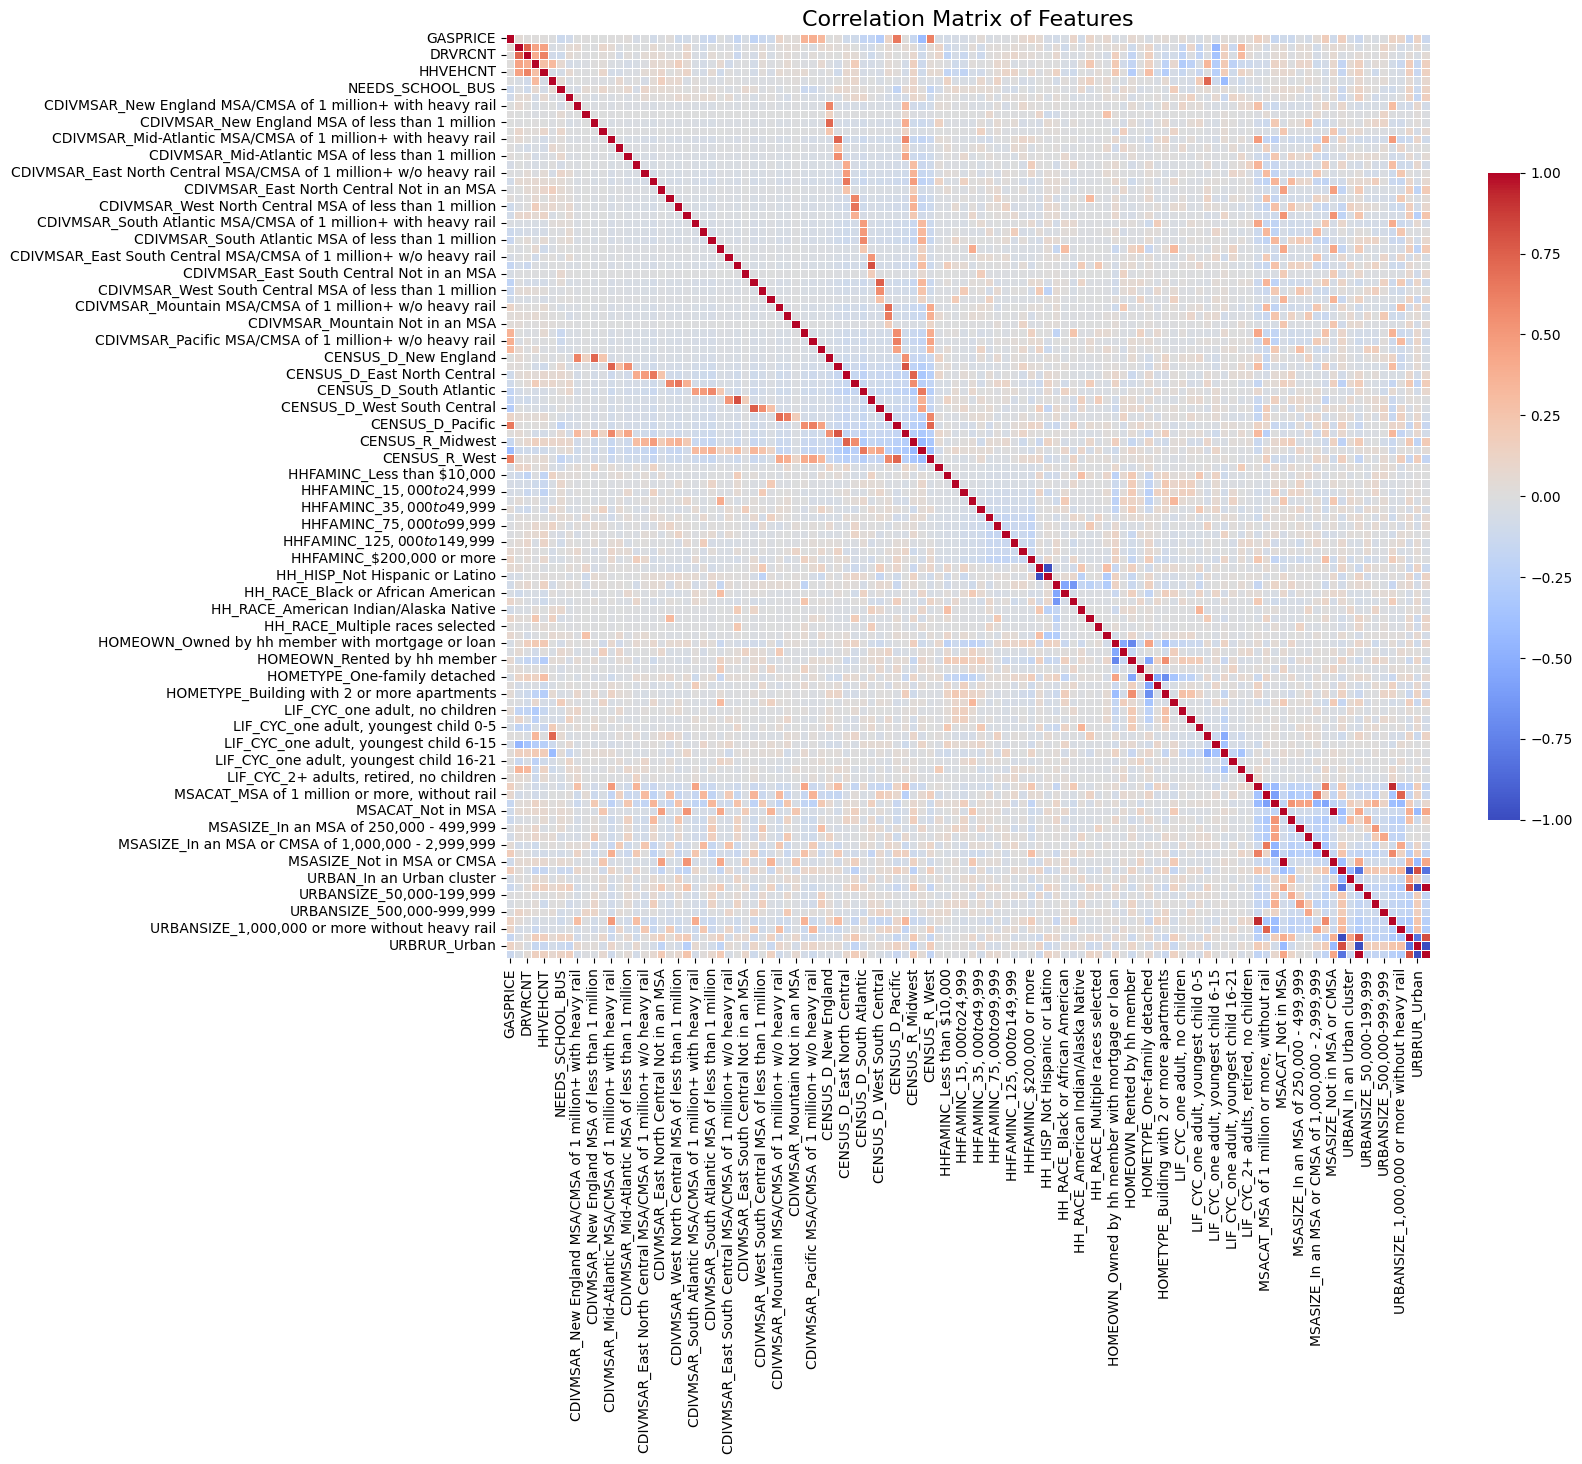

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = onehot_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            center=0,
            annot=False,  # True if you want the numbers on the heatmap
            fmt=".2f",
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.7})

plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()


fucking FINALLY lets save this ho

In [144]:
# Save the dataframe as CSV
onehot_df.to_csv('school_trips_onehot.csv', index=False)


In [145]:
from google.colab import files

files.download('school_trips_onehot.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

now lets make some spicy visualizations tysh

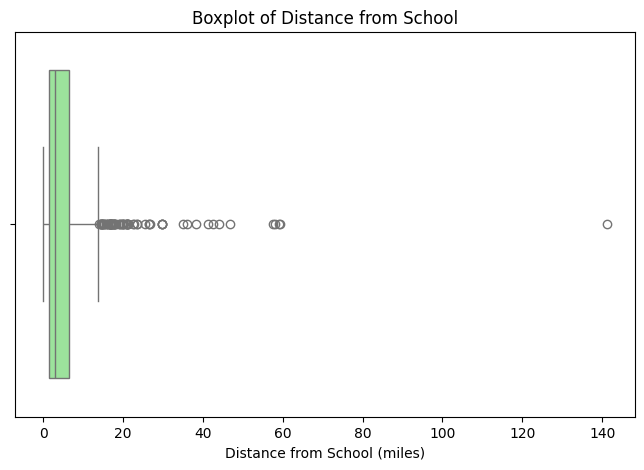

In [146]:
plt.figure(figsize=(8,5))
sns.boxplot(x=onehot_df['DISTANCE_FROM_SCHOOL'], color='lightgreen')
plt.title('Boxplot of Distance from School')
plt.xlabel('Distance from School (miles)')
plt.show()


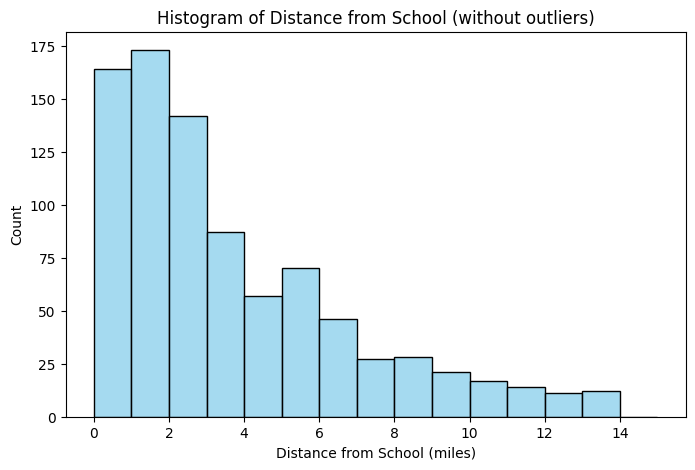

In [147]:
Q1 = onehot_df['DISTANCE_FROM_SCHOOL'].quantile(0.25)
Q3 = onehot_df['DISTANCE_FROM_SCHOOL'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = onehot_df[onehot_df['DISTANCE_FROM_SCHOOL'] <= upper_bound]

plt.figure(figsize=(8,5))
sns.histplot(filtered_df['DISTANCE_FROM_SCHOOL'], bins=np.arange(0, filtered_df['DISTANCE_FROM_SCHOOL'].max()+2, 1),
             kde=False, color='skyblue')
plt.title('Histogram of Distance from School (without outliers)')
plt.xlabel('Distance from School (miles)')
plt.ylabel('Count')
plt.show()


now some bar charts to compare demographics

/tmp/ipython-input-296789342.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_counts.index, y=race_counts.values, palette='muted')


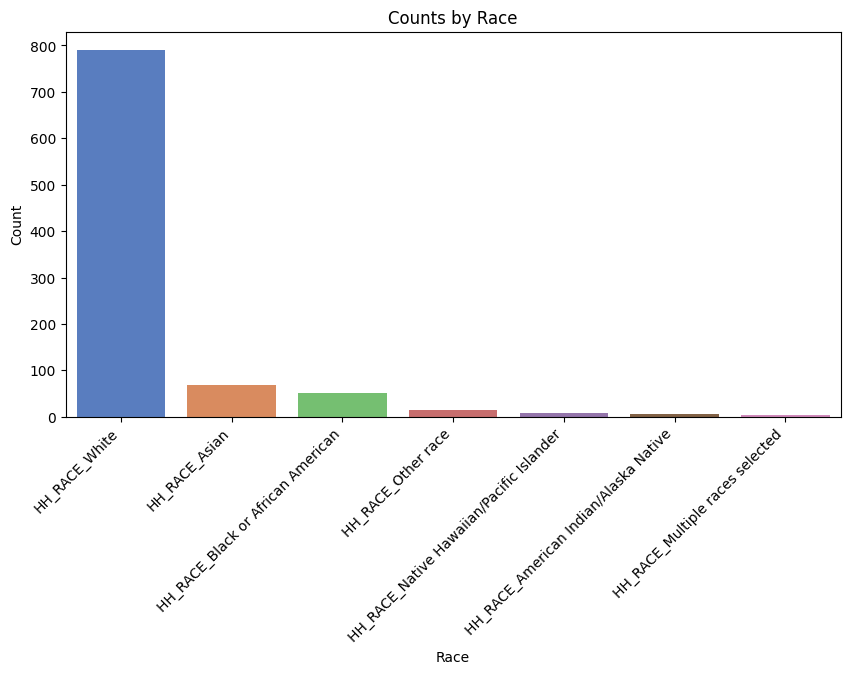

In [148]:
# Find columns related to race
race_cols = [col for col in onehot_df.columns if col.startswith('HH_RACE')]
race_counts = onehot_df[race_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=race_counts.index, y=race_counts.values, palette='muted')
plt.title('Counts by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


/tmp/ipython-input-3175665215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index, y=income_counts.values, palette='viridis', order=income_cols)


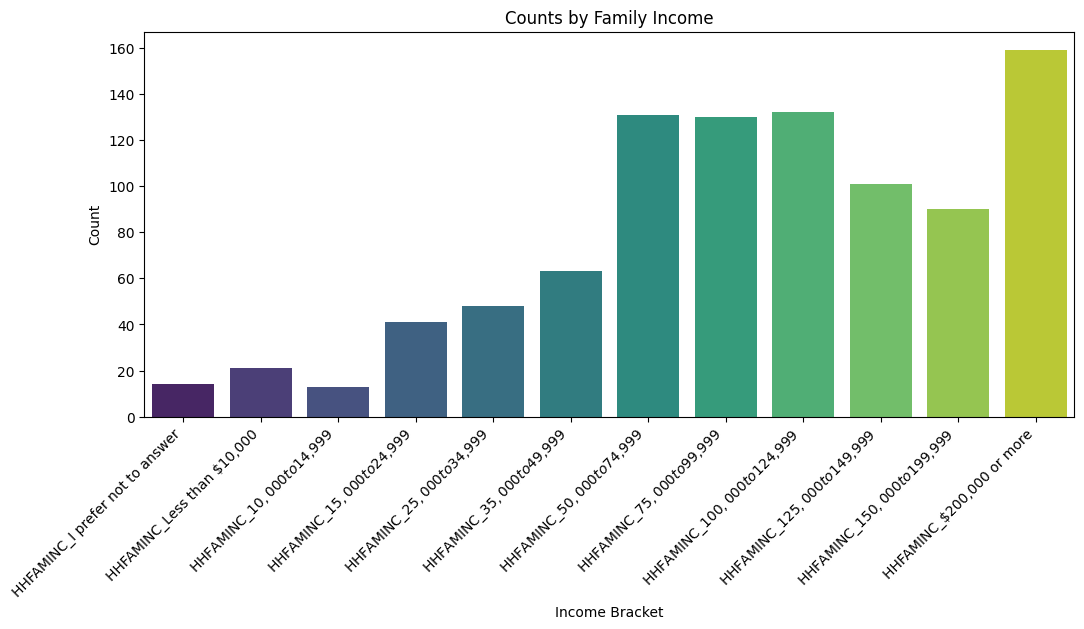

In [150]:
income_cols = [col for col in onehot_df.columns if col.startswith('HHFAMINC')]
income_counts = onehot_df[income_cols].sum()  # no sort_values()

plt.figure(figsize=(12,5))
sns.barplot(x=income_counts.index, y=income_counts.values, palette='viridis', order=income_cols)
plt.title('Counts by Family Income')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

